# **Triangular Arbitrage and Bermuda Tropics**

### **Applications of Tropical Geometry to Financial Economics**

**Original Author**: Austin Clime

**Dated**: 28 August 2021

# **Abstract**

In this exercise I demonstrate efficient methods for identifying optimal arbitrage opportunities in the foreign exchange (FX) spot market. The key pieces of information that can be obtained from this exercise include the largest possible arbitrage opportunity available at an instantaneous point in time, the largest possible arbitrage per executed trade, the currencies that must be exchanged to realize the arbitrage and in what order they must be exchanged.

I will first introduce FX arbitrage conceptually, and, with the help of various libraries available in Python, I will then demonstrate the step-by-step solution to verifying arbitrage opportunities, which uses a variation of standard linear algebra known as tropical algebra. I will also supplement these findings with demonstrations of code from the networkx library to visualize the flow of the optimal arbitrage as a graphical representation of a network.

I will finally provide concluding remarks on the topics presented in this exercise, followed by resources and appendices for those who wish to explore them further. 

Among the topics demonstrated in the appendices is an overview of Paul Klemperer's design for the product-mix auction, which, with FX arbitrage, make up some of the areas in financial economics to which we can apply the emerging field of tropical geometry.

# **Acknowledgments**

I would like to thank Bradley Mason for his discussions with me regarding the topics demonstrated in here. The solutions obtained here using tropical algebra are adapted from Bradley's senior honors thesis, which was a tremendous help and inspiration in constructing this exercise. I encourage those of varying degrees of familiarity with the topics discussed here, who are interested, to read Bradley's paper, which can be accessed here: https://commons.lib.jmu.edu/cgi/viewcontent.cgi?article=1303&context=honors201019  

# **1. Basics of Exchange Rates and FX Arbitrage**

For the purposes of this exercise, define an arbitrage strategy to be one which earns its implementer an instantaneous profit that is riskless in nature.

The unit with which we can measure arbitrage profit that I will opt to use here is the gross return on capital invested in the strategy. That is the multiplier of capital realized at the strategy's conclusion, which can be interpreted to be the percent of our invested capital we find ourselves left with.

The arbitrage multiplier as a unit of measurement is particularly useful in this context, as we need not limit ourselves to realizing profits in terms of one particular currency. Additionally, the path leading to arbitrage in the FX market can be thought of as being analogous to a complete circuit in that we realize the same total flow regardless of which point we choose to start at. 

That is, the total flow is the same regardless of from where in the circuit we start so long as we traverse the path in such a way that we start at the negative end of the source and return to the positive end of the source, and stay within the circuit of course. In the context of currency arbitrage, the choice of which currency represents the source, and which represent the components is arbitrary, as any of them will suffice in realizing the same total flow.

An exchange rate is the price of one currency in terms of another. The FX market is the largest and most liquid financial market, where large quantities are exchanged nearly continuously. For efficiency purposes, the names of currencies are shortened to unique three letter tickers. The first two letters typically represent the country that prints the currency, while the third is the name of the units given to the currency. The ticker '**USD**' represents the **U**nited **S**tates **D**ollar and '**JPY**' represents the **J**a**p**anese **Y**en. The price of the USD in terms of JPY is quoted as '**USD/JPY**' (sometimes the divider is dropped, and the quote is shortened to 'USD JPY'). Suppose the price of the USD in terms of JPY is quoted by a trader at 100. With this price we can take 1 USD and sell it for $1\;USD \, x \, \frac{100 \,JPY}{1 \,USD} = 100\;JPY$. Suppose we do this transaction and wish to exchange our JPY back for USD. Unsurprisingly, we would find ourselves left with $100\;JPY \, x \, \frac{1 \,USD}{100 \, JPY} = 1\;USD$, which is what we originally started with. 

This example is, of course, assuming two crucial pieces of information to be true: the first of which is that neither of the prices changed over the time it took to do both trades, and the second of which is that we did not incur any transaction costs in doing either trade. In reality, trade in the FX market is asymptotically continuous, and therefore prices are constantly being updated as entities respond to new information about supply and demand, and exchanging large quantities of a currency pair can evoke a large response from the market if this trading causes a shift in its belief(s) about either of the two. For the arbitrageur, we would expect these responses to be against their favor if buying one currency and selling another is, for example, perceived as increased demand for the former and decreased demand for the latter. This movement is more commonly known as price impact. 

Additionally, liquidity providers charge fees for the service(s) they provide in the form of Bid-Ask spreads to liquidity demanders. From your perspective as a trader, the dealer will only buy from you at a slight discount or sell to you at a slight premium. Returning to our USD/JPY example, a dealer would, for example, quote a price of 98/102. Therefore, we could exchange 1 USD for $1\;USD \, x \, \frac{98 \,JPY}{1 \,USD} = 98\;JPY$ and exchange those Yen back to Dollars for $98\;JPY \, x \, \frac{1 \,USD}{102 \,JPY} = 0.96\;USD$. In this example, we again assumed no price impact was incurred over the time it took to do both trades.

FX markets are again the most liquid in the world, and in liquid markets we would expect trading costs to be quite small, relatively speaking. However, it is these same observations and beliefs that would lead us to also expect arbitrage opportunities to be small on a per-unit basis, difficult/costly to discover and to be identified and eliminated quickly by capable investors. All of these factors mentioned previously make FX arbitrage an expensive operation to undertake on a large scale.

For the purposes of this exercise, we will assume there are no bid-ask spreads nor price impact incurred for any exchange rate. The practical way to overcome price impact is to trade faster than the other players in the market in such a way that is analogous to taking a snapshot of prices and fixing them as is until we are finished trading. Two key features of this strategy are, firstly, to select a universe of the most liquid currencies to approach perfect liquidity, and, secondly, to develop an efficient method for detecting arbitrage opportunities. The latter is the main purpose of this exercise.

An FX arbitrage strategy is one that involves buying and selling multiple currency pairs in a manner that realizes a capital multiplier greater than 1 after starting at one base currency and returning to that same base at the end of the last trade. Suppose a dealer quotes a price of 100 for USD/JPY and a price of 0.0105 for JPY/USD. There is a clear inconsistency here, as one can exchange 1 Dollar for 100 Yen, but can exchange 1 Yen for more than (1/100 = 0.01) Dollars. The Dollar is underpriced relative to the Yen, and under the assumptions we have set here, one could realize an arbitrage profit from buying low and selling high, where Dollars would be low and Yen high in this case. Assuming we are holding USD to start, we would realize an arbitrage profit by first selling 1 USD for $\frac{100 \,JPY}{1 \,USD}$ = 100 JPY, and selling our Yen for 100 JPY$x \, \frac{0.0105 \,USD}{1 \,JPY}$ = 1.05 USD. In doing so, we realize an arbitrage multiplier of $\frac{1.05 \,USD}{1 \,USD}$ = 1.05. 

Note here that our arbitrage multiplier is now unitless; we could have just as easily started with Yen, sold them for USD, exchanged those for Yen, in turn, and realized the same arbitrage multiplier. We would expect capable investors to soon realize this inconsistency and make the exchange rates mutually consistent by buying Dollars and selling Yen. Note that if you realize a multiplier of less than 1, you have still found an arbitrage profit, but have done the trades in the wrong order. Reversing the order of the trades will necessarily yield a multiplier greater than 1 in this case. Arbitrage in this way is a zero-sum game; a riskless profit for the arbitrageur is a riskless loss for the aggregation of the counterparties in the trades undertaken by the arbitrageur.

This example of two-way arbitrage is the easiest profit to realize, but we would expect these cases to be the rarest to find as well as those which yield the smallest profits, which we would expect to be almost entirely eliminated by bid-ask spreads in a practical setting. It is unsurprising that, in real-world settings, currency arbitrage profits are made, but usually involve more than two currencies. Naturally, more complicated price relationships are more difficult for investors to keep consistent and more costly to exploit, should there be inconsistencies, and we would thus expect these relationships to hold less often. Generally speaking, by including more currencies in our universe when looking for arbitrage, we would expect to find larger arbitrage profits, and to find them more frequently. The tradeoff however is that expanding our universe of currencies requires more trades and more time to execute the strategy, and thus our assumptions of negligible trading costs would be less likely to hold, which is a natural risk-reward tradeoff. I will nevertheless still demonstrate the tropical method for finding the maximal arbitrage for a universe of up to five currencies to preserve a sense of practicality.

### **1.1 Triangular Arbitrage: An Example**

Suppose we observe the following table of exchange rates:

\begin{array}[]
\begin{}{}
    & USD  & JPY    & EUR   &  \\
USD & 1    & 100    & 0.8   &  \\
JPY & 0.01 & 1      & 0.009 &  \\
EUR & 1.25 & 111.11 & 1     & 
\end{array}

Note that in this case each entry corresponds to the price of the $i^{th}$ row currency in terms of the $j^{th}$ column currency and USD/EUR here is the price of the Dollar measured in Euros, or the amount of Euros we can buy in exchange for selling 1 Dollar.

Note that by starting with 1 USD, we perform the following trades from left to right to realize an arbitrage multiplier of 1.125:

$1 \,USD \, x \, \frac{100 \,JPY}{1 \,USD} \, x \, \frac{0.009 \,EUR}{1 \,JPY} \, x \, \frac{1.25 \,USD}{1 \,EUR}$ = 1.125 USD

Notice the USD/EUR entry has a value of 0.8, but the exchange rate we realize from first going from USD to JPY and then from JPY to EUR yields an implied exchange rate of (100 x 0.0009)=0.9 for USD/EUR. This implied exchange rate is commonly referred to as a **cross rate** and can be used to identify inconsistencies in exchange rates under the set of assumptions we defined previously. The problem here is that we have two prices for the USD in terms of EUR: the quoted rate and the cross rate. We would expect capable investors to correct prices by exchanging currencies in the following order:

USD $\to$ JPY $\to$ EUR $\to$ USD .

Recalling our analogy of a complete circuit from before, a trader from Japan who identifies this opportunity can just as easily realize the same multiplier from exchanging these same currencies in the following order:

JPY $\to$ EUR $\to$ USD $\to$ JPY .

The last important points to be made here are that any currency in our universe can be exchanged for any other. Whether this exchange rate is a direct quote or cross rate is irrelevant to us here since it is as costless to go from USD $\to$ JPY $\to$ EUR as it is to go from USD $\to$ EUR. We can think of the table above as a representation of a strongly connected network. The currencies are the nodes and the exchange rates between them are the edges. Exchange rates vary from pair-to-pair, so the edges are weighted to reflect this. Setting our problem up in this way allows us to employ concepts from graph theory to identify arbitrage opportunities in an efficient manner. Graph theory can help us find pieces of information such as the optimal way one can traverse a path or the maximum flow that starts at one node and arrives at another.

In this way, exchange rates can be thought of as the distance traveled from starting at one currency at ending at another. Distance is however cumulative by addition, but our examples above have shown that traversing paths in the FX market are done multiplicatively (i.e. by selling the denominator currency to purchase the numerator currency). The simple trick is to take the natural logarithm of the exchange rate(s) such that trading realizes distance additively.

Notice that the price of a currency in terms of itself is always 1, and that log(1) = 0. That is, we do not travel any distance by exchange US Dollars for US Dollars directly. 

Returning to our three-way arbitrage example from above, we showed that we realized a cross rate of 0.9 for USD/EUR while the quoted rate was 0.8, and that we realized a multiplier of (0.9/0.8) = 1.125 as a result. Taking logs of the cross rate and quoted rate, we get -0.1054 and -0.2231, respectively. 

On a logarithmic scale we can see that we have extended the distance required to travel from USD to EUR by -0.1054 - (-0.2231) = 0.1178. Exponentiating the amount by which we extended the distance, we get 

$e^{0.1178}$ = 1.125.

Recall that $log(\frac{a}{b}) = log(a)-log(b)$ and therefore $exp( log(a)-log(b)) = \frac{a}{b}$ where here log($\bullet$) represents the logarithmic function and exp($\bullet$) the exponential function.

Thus, we can solve for the maximal multiplier by rescaling the exchange rates and solving for the maximal distance traveled from starting at a given currency and exchanging it across one or more currency pairs before finally returning to the currency we started with.

# **2. Tropical Approach to Arbitrage Strategies**

What does an arbitrage opportunity look like using Graph theory? 

Recall from our earlier point that the distance from USD to USD in a graph represented by the matrix of exchange rates is zero. This is intuitively sensible as exchanging USD by demanding USD in return should yield you the same amount of capital you started with in terms of the same currency you started with. 

An arbitrage opportunity in this exercise is a way to extend the distance between a currency and itself to be greater than zero. We are interested in discovering a cross rate that, for example, goes from USD to USD in such a way that the total distance traveled is positive. In graph theory, this idea is commonly referred to as the **maximum weight cycle**, where a cycle here is defined as a path that begins at the starting node and returns to that same node without visiting any node twice [**6**]. We are, of course, not counting beginning the cycle at a node as a visit.

We noted earlier that, given a set of $n$ exchange rates, the condition sufficient for arbitrage is as follows:

$w_1\; x \;w_2\; x \;...\; x\;w_n = \prod_{i=1}^{n}w_i > 1$ ,

and by taking logs we get:

$log(w_1)\; + \;log(w_2)\; + \;...\; +\;log(w_n) = \sum_{i=1}^{n}log(w_i) > 0$ .


[**1**] [**4**]

Having identified the conditions which constitute an arbitrage profit, we can now introduce the solution to efficiently identify these conditions using tropical algebra. Before doing so, however, I will first introduce the fundamental concepts and operations of tropical algebra. Those further interested in tropical algebra should see **Appendix A**.

### **2.1 Tropical Algebra: an Introduction**

Define the max-plus semi-ring $\mathbb{R}_{max} = \mathbb{R} \, \cup$ \{-$\infty$\} to be a framework in which addition ($\oplus$) and multiplication ($\otimes$) are commutative and associative, multiplication is distributive and there is an additive identity. We call the max-plus framework a semi-ring because it does not contain an additive inverse (as I will prove later), and therefore does not meet the full criteria to be a ring. Tropical addition and multiplication, given by ($\mathbb{R}_{max}$, $\oplus, \otimes$), are related to those in the ring given by ($\mathbb{R}$, +, x) as follows:


$a \, \oplus \, b \,:=$ max{a,b}

and

$a \, \otimes \, b \,:=$ $a\,+\,b$. [**6**][**7**]

In max-plus algebra, we have the additive identity $-\infty$ where $a \,\otimes\, -\infty = -\infty$ for all $a\in\mathbb{R}$ and the multiplicative identity of 0 where $a \,\otimes\, 0 = a$ for all $a\in\mathbb{R}$.

While we have an additive identity in max-plus algebra, in order to have an additive inverse, we need such a case where the addition of two or more numbers returns the additive identity. This is impossible as $a\oplus -\infty\ne -\infty$ for all $a\in\mathbb{R}$. Once again, it is this property of tropical algebra that disqualifies the max-plus framework as a valid ring. There is however a multiplicative inverse -a where $a\otimes -a = 0$ for all $a\in\mathbb{R}$. That is, we have the case where the multiplication of a number with itself returns the multiplicative identity of zero. [**6**][**7**]

We can show that both tropical addition and multiplication are associative and commutative, and that tropical multiplication is distributive by relating these operations to their counterparts from the ring ($\mathbb{R}$, +, x). Observe the following relationships for a,b,c $\in \mathbb{R}$:


$(a \, \oplus \, b) \,\oplus c = a \, \oplus \, (b \,\oplus c) =max(a,b,c)\iff max(max(a \, , \, b) \,, c) = max(a \, , \, max(b \,, c))$
$(a \, \otimes \, b) \,\otimes c = a \, \otimes \, (b \,\otimes c) =a+b+c \iff (a \, + \, b) \,+ \,c = a \, + \, (b \,+\, c)$

\

$a \, \oplus \, b \,\oplus c = c \, \oplus \, b \,\oplus a =max(a,b,c)\iff max(a \, , \, b \,, c) = max(c \, , \, b \,, a)$
$a \, \otimes \, b \,\otimes c = c \, \otimes \, b \,\otimes a =a+b+c \iff a \, + \, b \,+\,c = c \, + \, b \,+\,a$

\

$a \, \otimes \, (b \,\oplus c) = (a \, \otimes \, b) \,\oplus (a \, \otimes \, c) =a + max(b,c)= max(a+b, a+c) \iff a \,+\, max(b \,,\, c) = max( (a \, + \, b) \,,\,(a \, + \, c) )$.


We can see that since tropical addition and multiplication exhibit certain properties identical to those of their counterparts in standard algebra, the two operations are both commutative and associative, and tropical multiplication is distributive.

It is also worth noting that subtraction does not exist per se in the max-plus semi-ring, but we can instead multiply the minuend by the negative of the subtrahend.

The last scalar operation we need to cover before extending this framework to matrices and vectors is exponentiation, which will become very critical later when discussing the process for detecting optimal arbitrage opportunities. Consider the following examples of exponentiation in $\mathbb{R}_{max}$:

$a^{\otimes z} = \underbrace{a \otimes a \otimes a \,\otimes\,... \otimes a}_{z \,times} := az$

and for b > a,

$(a \oplus b)^{\otimes z} = \underbrace{b \otimes b \otimes b \,\otimes\,... \otimes b}_{z \,times} := bz$ .


We also have the min-plus semi-ring defined as $\mathbb{R}_{min} = \mathbb{R} \, \cup$ \{$\infty$\} where, as is in the max-plus framework, $a \, \otimes \, b \,:=$ $a\,+\,b$, but, unlike in the max-plus semi-ring, in this framework, $\, a \, \oplus \, b \,:=$ min{a,b}. This semi-ring has properties that are either identical to its max-plus relative, or would otherwise be by substituting the function min($\bullet$) anywhere there is the function max($\bullet$). The min-plus framework will however not be applicable to this exercise, and those curious about applying the min-plus framework should refer to [**7**] and **Appendix A**.

### **2.2 Extension to Linear Algebra**

Define $\mathbb{R}^{nxn}_{max}$ as the set of $n$ x $n$ matrices with coefficients in $\mathbb{R}_{max}$. [**7**] I will first demonstrate matrix addition and multiplication, which are fundamental in constructing matrix powers and eigenvalue-eigenvector pairs, which will, in turn, be instrumental in identifying arbitrage opportunities. As with matrix addition in standard algebra, matrix addition in tropical algebra is only compatible between two $n$ x $n$ matrices and the result of such is, unsurprisingly, a matrix with dimensions $n$ x $n$. Similarly, tropical matrix multiplication shares much in common with the dot product in standard linear algebra, whereby such is only compatible between two matrices $\textbf{A}^{hxn}$ and $\textbf{B}^{nxk}$, and the result is the matrix $\textbf{C}^{hxk}$. As I will show later, tropical addition between matrices is done elementwise as it is in standard addition, and matrix products are computed along the shared dimension(s). One would simply substitute standard addition with tropical addition and standard multiplication with its tropical counterpart. 

As a precursor to our ultimate goal of identifying optimal arbitrage opportunities, tropical matrix multiplication is a particularly useful tool. For $z \in \{{1,...,q}\}$, recall that when computing a dot product, the entry $\textbf{C}_{i,j}$ in $\textbf{C}^{hxk}$ is obtained by first multiplying the $z^{th}$ element in row $\textit{i}$ of $\textbf{A}^{hxq}$ by the $z^{th}$ element in column $\textit{j}$ of $\textbf{B}^{qxk}$ up to and including the $q^{th}$ element, and then adding the products together. 

In this way, tropical multiplication can be thought of as analogous to accumulating distance and addition to evaluating distance traveled at the margin, which is the process used to discover arbitrage in **section 1.1**.

For the following examples below, let $\textbf{A} , \textbf{B} \in \mathbb{R}^{nxn}_{max}$ and $c \in \mathbb{R}_{max}$.

#### **2.2.1 Matrix Addition**

Tropical addition between $\textbf{A}$ and $\textbf{B}$ is computed by addition of the corresponding components, given, of course, that the two matrices are isomorphic. That is $[\textbf{A} ⊕ \textbf{B}]_{ij} =a_{ij} \oplus b_{ij}$. [**7**]

For example,

$\begin{bmatrix}
    -\infty  & 7  &0\\
    7        & 5  &0\\
    3        & 8  &2\\
\end{bmatrix} 
\bigoplus 
\begin{bmatrix}
    1         & 1        &-\infty \\
    -\infty   & -\infty  &3 \\
    -\infty   & -\infty  &0 \\
\end{bmatrix}
=
\begin{bmatrix}
    (-\infty \oplus 1)   & (7 \oplus 0)        & (0 \oplus -\infty) \\
    (7 \oplus -\infty)   & (5 \oplus -\infty)  & (0 \oplus 3) \\
    (3 \oplus -\infty)   & (8 \oplus -\infty)  & (2 \oplus 0) \\
\end{bmatrix}
=
\begin{bmatrix}
    1   & 7  &0\\
    7   & 5  &3\\
    3   & 8  &2\\
\end{bmatrix}$ 

#### **2.2.2 Matrix Multiplication**

We noted earlier that multiplication between two matrices in the max-plus framework shares many similarities with its counterpart in standard linear algebra. The operation is performed along the dimension shared by both matrices conditional on if it is both the column dimension of the first matrix and the row dimension of the second. In this way, the order with which we multiply the matrices is as necessary in determining the compatibility in tropical linear algebra as it is in standard linear algebra. The methodology for computing the tropical product of two matrices is similar to that of the standard dot product. As stated above, $\textbf{A}^{hxq}  \otimes \textbf{B}^{\,qxk}$ produces all $c_{i,j} \in \textbf{C}^{\,hxk}$ by, $\,$for each $\textit{i} \in \{{1,...,h}\}$, $\,$multiplying the $\textit{i}^{\, th}$ row of $\textbf{A}$ by the $\textit{j}^{\, th}$ column of $\textbf{B}$, each of dimensions $q \,x\, 1$, component-wise for each $\textit{j}\in \{{1,...,k}\}$ and summing across the products in each iteration. That is

$c_{i,j} =\bigoplus_{n=1}^q \,(a_{i,n} \otimes b_{n,j}) = \, max _{n=1}^{q}\{a_{i,n}+b_{n,j}\}$

and, for example,

$
\begin{bmatrix}
    1        & 5        &4        &2         &9      \\
    -\infty  & -\infty  &0        &-\infty   &-\infty \\
    4        & 3        &-\infty  &2         &2        \\
\end{bmatrix} 
\bigotimes
\begin{bmatrix}
    -\infty  &3   &7  &-\infty  \\
    9        &8   &0  &1         \\
    -\infty  &2   &4  &-\infty    \\
    6        &0   &1  &7           \\
    4        &9   &2  &7            \\
\end{bmatrix}$

$
\hspace{225pt}=
\begin{bmatrix}
    \bigoplus(1\otimes-\infty \,,\, 5\otimes9 \,,\, 4\otimes-\infty \,,\,2\otimes6 \,,\, 9\otimes4)        
    & \bigoplus(1\otimes3 \,,\, 5\otimes8 \,,\, 4\otimes2 \,,\,2\otimes0 \,,\, 9\otimes9)        
    &\bigoplus(1\otimes7 \,,\, 5\otimes0 \,,\, 4\otimes4 \,,\,2\otimes1 \,,\, 9\otimes2)        
    &\bigoplus(1\otimes-\infty \,,\, 5\otimes1 \,,\, 4\otimes-\infty \,,\,2\otimes7 \,,\, 9\otimes7)               
    \\
    \bigoplus(-\infty\otimes-\infty \,,\, -\infty\otimes9 \,,\, 0\otimes-\infty \,,\,-\infty\otimes6 \,,\, -\infty\otimes4)  
    & \bigoplus(-\infty\otimes3 \,,\, -\infty\otimes8 \,,\, 0\otimes2 \,,\,-\infty\otimes0 \,,\, -\infty\otimes9)
    &\bigoplus(-\infty\otimes7 \,,\, -\infty\otimes0 \,,\, 0\otimes4 \,,\,-\infty\otimes1 \,,\, -\infty\otimes2)        
    &\bigoplus(-\infty\otimes-\infty \,,\, -\infty\otimes1 \,,\, 0\otimes-\infty \,,\,-\infty\otimes7 \,,\, -\infty\otimes7)
    \\
    \bigoplus(4\otimes-\infty \,,\, 3\otimes9 \,,\, -\infty\otimes-\infty \,,\,2\otimes6 \,,\, 2\otimes4)        
    & \bigoplus(4\otimes3 \,,\, 3\otimes8 \,,\, -\infty\otimes2 \,,\,2\otimes0 \,,\, 2\otimes9)        
    &\bigoplus(4\otimes7 \,,\, 3\otimes0 \,,\, -\infty\otimes4 \,,\,2\otimes1 \,,\, 2\otimes2)        
    &\bigoplus(4\otimes-\infty \,,\, 3\otimes1 \,,\, -\infty\otimes-\infty \,,\,2\otimes7 \,,\, 2\otimes7)               
    \\
\end{bmatrix}
$

$
=
\begin{bmatrix}
    14       &18  &11  &16      \\
    -\infty  &2   &4   &-\infty  \\
    12       &11  &11  &9         \\
\end{bmatrix} 
$ .

Multiplication of a matrix by a scalar is as simple as broadcasting the operation across the components. That is:

$[c\otimes \textbf{A}]_{ij} =c \otimes a_{ij}$ [**7**] and

$
2 \otimes
\begin{bmatrix}
    9  &4  \\
    4  &3   \\
\end{bmatrix}
=
\begin{bmatrix}
    2\otimes9 &2\otimes4  \\
    2\otimes4  &2\otimes3   \\
\end{bmatrix}
=
\begin{bmatrix}
    11 &6  \\
    6  &5   \\
\end{bmatrix}$ .

#### **2.2.3 Identity Matrices**

Identity matrices in $\mathbb{R}^{nxn}_{max}$ are those whose elements which lie on the diagonal are equal to 0 (the multiplicative identity), and whose elements which lie off the diagonal equal the additive identity ($-\infty$ when in $\mathbb{R}_{max}$). More formally, for $I_{x,y} \in I^{nxn}_{max}$ ,
\begin{align}
    I_{x,y} = \Bigg\{
        \begin{array}{ll}
        0, & \text{if } x = y \\
        -\infty, & \text{otherwise.}
        \end{array} \textbf{[6]}
\end{align} 

### **2.3 Introductory Graph Theory**

Figures in Euclidean geometry are said to be topologically equivalent if their areas can be morphed such that they are congruent, conditional on neither figure being cut apart or glued together to another. Figures in tropical geometry can also share this property, and it is because of topological equivalence that we can compress the edges of a graph into the elements of a matrix, or likewise expand the elements to appear as edges on a graph. **[3]**

A graph, $G$, is a collection of nodes, or equivalently vertices, and edges ( i.e. $G=(V(G), E(G))$ ). A node is a location or entity that participates in a network, and the interaction between two nodes is established by the edge(s) that connect them. The nodes of $G$ are in the set $V(G) = \{v_1, ... ,v_n  \}$ and the edges in the set $E(G) = \{e_{i,j}, ... ,e_{n,n}  \} or \{e_{i \to j}, ... ,e_{n \to n}  \}$. In the setting of foreign exchange, a given exchange rate is the edge $e_{i,j}$ that connects currency $\textit{i}$ to $\textit{j}$, or equivalently, the price at which we can exchange currency $\textit{i}$ for currency $\textit{j}$. Exchange rates are weighted prices, and naturally so are the edges of the graphical representation of a network of exchange rates. For the remainder of our discussion about graphs, we will be strictly dealing with the strongly-connected weighted graph $G$, given by $G=(V(G), E(G), W(G))$, where $W(G) = \{w_{i,j}, ... ,w_{n,n}  \}$ is the set of weights assigned to the edges. That is, each $e_{i,j} \in E(G)$ has a weight $w_{i,j}$ if $v_i$ and $v_j$ are connected by the edge $e_{i,j}$. If there is no connection between $v_h$ and $v_k$, then $w_{h,k}$ is equal to the additive identity. This has some important context in the foreign exchange setting we have described so far, particularly when looking at the direct quote for the price of a currency in terms of itself. While in theory we can travel directly from one currency node to itself, in practice, no entity in the FX market would stand to gain anything from buying the same amount of currency they already hold in their inventory (assuming they are simultaneously selling that same currency) if there are no spreads, and thus we weight these trades as having zero distance. In max-plus algebra, we weight these trades with the additive identity, $-\infty$, which means there is no instance in which we would find these trades optimal in any way. It is possible for other graphs to have real weights assigned to the edges connecting nodes to themselves, as we will show later in examples, but there is no concept of this in FX markets. [**6**][**7**]

Per our assumption of no bid-ask spreads, we are assuming, for direct quotes, there is only one price at which an exchange can occur, and we represent this idea by limiting the number of edges which connect $v_i$ to $v_j$ that originate from $v_i$ to one ($w_{i,j}$). Also, by presuming two-way arbitrage opportunities do not exist, edges that travel in exactly opposite directions have exactly opposite magnitudes. If traveling from $v_{i}$ to $v_{j}$ on $e_{i,j}$ covers a distance of $w_{i,j}$, then traveling back from $v_{j}$ to $v_{i}$ using $e_{j,i}$ covers a distance of $w_{j,i} = -w_{i,j}$ for a net distance of zero for the roundtrip. [**6**][**7**]

It will be useful to represent the matrix **A** with the graph $G(A)$ in searching for arbitrage opportunities, and with the foundation we have laid, the procedure for doing so is quite simple. The edge set $E(G)$ contains the entries in **A** and its corresponding values are mapped to the set of weights $W(G)$, or put differently: $w_{i,j} = a_{i,j} \in \textbf{A}$. Observe the graphical representation of the matrix from **section 1.1**.

In [ ]:
! pip install networkx

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

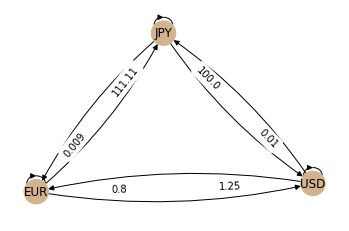

In [ ]:
currencies = ['USD', 'JPY', 'EUR']

rates=[ [	1,	  100,	  0.8],
        [	0.01,	1,	    0.009],
        [	1.25,	111.11,	0]]

mtx = pd.DataFrame(rates, index=currencies, columns=currencies)
log_mtx = mtx.apply(np.log)
A = log_mtx.values
np.fill_diagonal(A, -np.inf)
A = pd.DataFrame(A, columns=currencies,index=currencies)

G = nx.DiGraph()

for i in A.index:  
  G.add_node(i, color='tan') 
  for j in A.columns:
    if A.at[i,j] >= 1:
      G.add_edge(i, j, weight= mtx.at[i,j] , color='g')   
    elif A.at[i,j] >= 0.009:
      G.add_edge(i, j, weight= mtx.at[i,j], color='r' )   
    else:
      G.add_edge(i, j, weight= mtx.at[i,j], color='black' )   

colors = nx.get_edge_attributes(G,'color').values()
node_colors = nx.get_node_attributes(G,'color').values()
wts = nx.get_edge_attributes(G,'weight')

w_1 = dict()
w_2 = dict()

for (key, value) in wts.items():
   if value <= 0:
    w_1[key] = value
   else:
    w_2[key] = value

nx.draw_networkx_edge_labels(G, pos=nx.spectral_layout(G) ,edge_labels=w_1, rotate=True, label_pos=0.7) #label_pos
nx.draw_networkx_edge_labels(G, pos=nx.spectral_layout(G) ,edge_labels=w_2, rotate=True, label_pos=0.3) #label_pos
nx.draw(G, with_labels=True, pos=nx.spectral_layout(G ), node_color=list(node_colors) , connectionstyle='arc3, rad = 0.1' , arrowsize=11 , node_size=600 )


\begin{array}[]
\begin{}{}
    & USD  & JPY    & EUR   &  \\
USD & 1    & 100    & 0.8   &  \\
JPY & 0.01 & 1      & 0.009 &  \\
EUR & 1.25 & 111.11 & 1     & 
\end{array}

In practice, we will be working with the natural logarithm of the exchange rate matrix, and we replace the additive identity of zero in standard algebra with its tropical counterpart (-$\infty$) such that our matrix representation is in the following form:

\begin{array}[]
\begin{}{}
    & USD  & JPY    & EUR   &  \\
USD & -\infty    & 4.6052    & -0.2231     \\
JPY & -4.6052    & -\infty      & -4.7105   \\
EUR & 0.2231     & 4.7105 & -\infty      
\end{array}

Now that we can represent our network of log exchange rates as a matrix, we will now begin exploring an application of tropical matrix multiplication, matrix exponentiation, which will become useful in identifying optimal arbitrage opportunities.

### **2.4 Matrix Powers**

Let the $\textit{z}^{th}$ power of $\textbf{A}$, $\textbf{A}^{\otimes z}$, be the result of multiplying $\textbf{A}$ by itself $\textit{z}$ times. **[7]**


Consider the following example for $\textbf{A}= 
\begin{bmatrix}
    5  &9  \\
    4  &2   \\
\end{bmatrix}$:

$\begin{bmatrix}
    5       & 9 \\
    4       & 2 \\
\end{bmatrix}^{\otimes 2} = \begin{bmatrix}
    5       & 9 \\
    4       & 2 \\
\end{bmatrix} \bigotimes \begin{bmatrix}
    5       & 9 \\
    4       & 2 \\
\end{bmatrix} = \begin{bmatrix}
    max(5+5, 9+4)       & max(5+9, 9+2) \\
    max(4+5, 2+4)       & max(4+9, 2+2) \\
\end{bmatrix} = \begin{bmatrix}
    13      & 14 \\
    9       & 13 \\
\end{bmatrix}$


\$\hspace{225pt} =$

\begin{bmatrix}
    max(w_{1\to1} + w_{1\to1} ,  w_{1\to2} + w_{2\to1})       & max(w_{1\to1} + w_{1\to2} ,  w_{1\to2} + w_{2\to2}) \\
    max(w_{2\to1} + w_{1\to1} ,  w_{2\to2} + w_{2\to1})       & max(w_{2\to1} + w_{1\to2} ,  w_{2\to2} + w_{2\to2}) \\
\end{bmatrix} 

$\hspace{225pt} =$

\begin{bmatrix}
    w_{1\to2} + w_{2\to1}       & w_{1\to1} + w_{1\to2} \\
    w_{2\to1} + w_{1\to1}       & w_{2\to1} + w_{1\to2} \\
\end{bmatrix}

\

Take, for example, $a_{1,2} \in \textbf{A}^{\otimes 2}$, which, in graph theory, represents the longest path of length 2 (i.e. visits a total of 2 nodes) that begins at node 1 and ends at node 2. A path here is defined as the accumulation of edges traversed such that consecutive edges have matching endpoints. Thinking of $a_{i,j}$ as the distance covered traveling from $v_i$ to $v_j$, in our example here, the possible eligible paths of length 2 are:

**1)** traveling from $v_1$ to itself and then from $v_1$ to $v_2$

**2)** traveling from $v_1$ to $v_2$ and then from $v_2$ to itself.

Recall from earlier that by multiplying $\textbf{A}$ by itself twice, we get $a^{\otimes 2}_{1,2}$ as the sum of the products $a_{1,1} \otimes a_{1,2}$ and $a_{1,2} \otimes a_{2,2}$. In taking the tropical sum of these products, we are choosing the greatest of the distances among the paths which begin at $v_1$ and end at $v_2$ that visit only a total of two nodes, which is 14 in this case.

Observe the process for computing the third of power of $\textbf{A}$ to better to understand the idea of determining the longest path. Here $a^{\otimes 3}_{1,2} \in \textbf{A}^{\otimes 3}$ is analogous to the most distance covered among all length 3 paths that begin at node 1 and end at node 2. The eligible paths are as follows:

**1)** traveling from $v_1$ to $v_2$, from $v_2$ to $v_1$ and then from $v_1$ to $v_2$

**2)** traveling from $v_1$ to itself, from $v_1$ to $v_2$ and then from $v_2$ to itself.

We compute $\textbf{A}^{\otimes 3}$ as follows:


$\begin{bmatrix}
    5       & 9 \\
    4       & 2 \\
\end{bmatrix}^{\otimes 3} = \begin{bmatrix}
    5       & 9 \\
    4       & 2 \\
\end{bmatrix} \bigotimes \begin{bmatrix}
    5       & 9 \\
    4       & 2 \\
\end{bmatrix} \bigotimes \begin{bmatrix}
    5       & 9 \\
    4       & 2 \\
\end{bmatrix} = \begin{bmatrix}
    13      & 14 \\
    9       & 13 \\
\end{bmatrix} \bigotimes \begin{bmatrix}
    5       & 9 \\
    4       & 2 \\
\end{bmatrix} = \begin{bmatrix}
    max(13+5, 14+4)       & max(13+9, 14+2) \\
    max(9+5,  13+4)       & max(9+9,  13+2) \\
\end{bmatrix} = \begin{bmatrix}
    18      &  22 \\
    17       & 18 \\
\end{bmatrix}$

\$\hspace{225pt} =$

\begin{bmatrix}
    max(w_{1\to2} + w_{2\to1} + w_{1\to1} ,  w_{1\to1} + w_{1\to2} + w_{2\to1})       & max(w_{1\to2} + w_{2\to1} + w_{1\to2} ,  w_{1\to1} + w_{1\to2} + w_{2\to2}) \\
    max(w_{2\to1} + w_{1\to1} + w_{1\to1} ,  w_{2\to1} + w_{1\to2} + w_{2\to1})       & max(w_{2\to1} + w_{1\to1} + w_{1\to2} ,  w_{2\to1} + w_{1\to2} + w_{2\to2}) \\
\end{bmatrix} 

$\hspace{225pt} =$

\begin{bmatrix}
    w_{1\to2} + w_{2\to1} + w_{1\to1}       & w_{1\to2} + w_{2\to1} + w_{1\to2} \\
    w_{2\to1} + w_{1\to2} + w_{2\to1}       & w_{2\to1} + w_{1\to1} + w_{1\to2} \\
\end{bmatrix}.

\

### **2.5 Arbitrage as Optimal Cycles**

Recall earlier that $a_{1,2}^{\otimes 2} \in \textbf{A}^{\otimes 2}$ resulted in traveling from $v_1$ to itself and then from $v_1$ to $v_2$. However, in computing the third power of $\textbf{A}$, specifically $a_{1,2}^{\otimes 3} \in \textbf{A}^{\otimes 3}$ as an example, we see that continuing along this path by traveling from $v_2$ to itself is no longer optimal, and rather we can gain an additional 6 (22-16) units of distance by taking path **2)**. The concept presented here is quite similar to the idea of edge relaxation in network modeling. However, in this context, distance accumulated is not a cost incurred, but rather the multiplier we realize on a series of trades, so our problem becomes one of stretching the edges to maximize distance covered over a path. 

For $i \in \{{2,...,z}\}$, consider a path that concludes at some arbitrary node $z$. It follows that if the edge $e_{i-1, i}$ is traversed at some point along the path is, then the ensuing edge traversed must be $e_{i, i+1}$, for all $i \leq z-1$. **[7]**

Recall from the earlier discussion in **section 1.1** that an arbitrage strategy is analogous to a path that begins at a given currency and travels to one or more different currencies before returning to the starting currency in such a way that covers positive net distance (i.e. a positive weight cycle). In this way, we are finding a cross-rate that is equivalent to selling one unit of a currency to buy more than one unit of the same currency by executing the trades costlessly and in an asymptotically simultaneous manner.$\,$Also recall that we deal with logarithmic exchange rates to properly account for the accumulation of distance over the trades executed, and that positive distance is analogous to a multiplier greater than 1.

We know that by finding the $\textit{z}^{th}$ power of $\textbf{A}$, each entry $a_{i,j}^{\otimes \textit{z}} \in \textbf{A}^{\otimes z}$ is synonymous with the longest path of length $\textit{z}$ from $v_i$ to $v_j$. When working with the square matrix $\textbf{A}^{nxn}$, we need not consider any powers greater than $n$ as, in a strategy of trading currencies, returning to a currency we have already visited in a path is strictly no more optimal than visiting each currency (involved in said strategy) only once. The exceptions are, as I will demonstrate later, the powers which are multiples of $n$, which are repeated cycles.

For $k \geq$ $n > 1$, assume an optimal cycle exists that visits a total of $k$ nodes, starts at some node $v_{\textit{i}}$ before returning to $v_{\textit{i}}$ to conclude and covers a total distance of $D$. Further, assume the distance between $v_{\textit{i}}$ and itself is 0 and the first edge traversed in the optimal cycle mentioned before is from $v_{\textit{i}}$ to $v_{\textit{l}}$ and spans a distance of $\boldsymbol\delta$. For $k = n + 1$, visiting any another node when traversing the $\textit{k}^{th}$ edge in the cycle besides $v_{\textit{i}}$ would mean the cycle does not conclude at $v_{\textit{i}}$, which would violate the definition of a cycle. Therefore, the only valid edge that can be traversed here is $e_{\textit{i},\textit{i}}$ , which, as stated before, covers a distance of zero and therefore does not accumulate any additional marginal distance compared to the case where $k = n$. For $k = n + 2$, the optimal cycle would traverse $e_{\textit{i},\textit{l}}$ as it did after the last time it visited $v_{i}$. After doing so, the only way to return to $v_{i}$ is to traverse $e_{\textit{l},\textit{i}}$. In the case where we assume two-way arbitrage opportunities are non-existent, the distance traveled from node $\textit{l}$ to $\textit{i}$ must be  $-\, \boldsymbol\delta$ units if the distance traveled from node $\textit{i}$ to $\textit{l}$ is $\boldsymbol\delta$ units, and reversing the order of the trades, as we noted earlier, exactly negates contribution to the multiplier. We therefore gain no marginal distance by returning to pairs we have already visited. Similar cases hold for $k = n + c$ for all $c \in \mathbb{R}$ except for the special cases where $k$ is a multiple of $n$. In these such cases we would simply be fully repeating the same optimal cycle multiple times over, covering a total distance of $D \frac{k}{n}$.

We will therefore only concern ourselves with the powers of $\textbf{A}$ up to and including $n$ since, as shown above, powers greater than $n$ either add no marginal distance or are scaled-up versions of the $n$-length optimal cycle. Mapping this analogy back to matrices, the entries in $\textbf{A}^{\otimes z}$ which are of interest to us are those which lie along the diagonal (i.e., $a_{i,j} \in \textbf{A}^{\otimes z}$ for all $\textit{i} = \textit{j} \in \mathbb{R}$). These entries represent the distances covered in all $\textit{z}$-length cycles. The maximum value among the weighted cycles on the diagonal is the maximum distance covered across all strategies comprised of $\textit{z}$ trades. In $\textbf{A}^{\otimes z}$, how many entries would we expect to contain this maximum value? The answer is of course $\textit{z}$ entries. Recall from **section 1.1** that all three trades are equally necessary to realize the arbitrage multiplier and that it is irrelevant from where in the cycle we enter in order to realize the multiplier so long as we complete all three necessary trades correctly (meaning we are buying the underpriced currency by selling the overpriced one, as opposed to vice versa). Thus, in $\textbf{A}^{\otimes z}$, the conditions sufficient for a $\textit{z}$-trade arbitrage opportunity are the presence of $\textit{z}$ entries on the diagonal $\{a^{\otimes \textit{z}}_{\textit{i},\textit{i}}\} \in \textbf{A}^{\otimes z}$ whose values are each $D$ for all $D > 0 \in \mathbb{R}$. The maximum arbitrage multiplier we can realize in this framework is thus:
$\bigoplus_{z=1}^{n} \bigoplus_{i=1}^{z} a^{\, \otimes \textit{z}}_{i,i} \, $for all$ \, i, z, n \in \mathbb{R}$.

The example above demonstrates how to find the largest absolute arbitrage opportunity, but as we noted earlier, there are transaction costs we ignore here that would, in practice, limit our ability to realize the maximal arbitrage, or even any at all. By conducting more trades in a larger universe of currencies, we might expect higher order cross rates between currency pairs to hold less often and not hold as strongly, and therefore for absolute arbitrage opportunities to be potentially larger and more frequent in nature. However, by conducting more trades to exploit higher order opportunities, we incur both greater implicit and explicit transaction costs, the most noteworthy among the former is price impact, which can be significantly hampering to large-scale strategies. One solution to account for transaction costs is to normalize our arbitrage profit realized over a given number of trades by the number of trades, which is also known as the **maximum normalized weight cycle. [6]** Such normalization has the effect of attempting to mitigate the effects of those transaction costs which scale with the complexity of the strategy. Suppose our universe is contained to $n \geq \theta$ currencies and that the logarithm of the highest arbitrage achievable over a given number of trades $\theta$ is given by the function :

$f(\theta)= \frac{\sum_{i=1}^{n}log(w_i)}{\theta}$ .

Our optimal solution then becomes

$\theta^{\, *} = \underset{\theta}{\max} f(\theta)$ for $\theta \in \mathbb{R}$ and $f(\theta) > 0$ .


Suppose the edge weights in a $\theta$-trade strategy are given by:

$\Omega(f(\theta)) = \{{w_i, \,...\,, w_{\theta}}\}$

and further, assume that $f(\theta^{\, *})$ is a known real scalar that is unique for all $\theta \in \mathbb{R}$.


Given two $(2\theta) x 1$ isomorphic vectors $\Phi$ and $\Upsilon$, the universe of all potential currency pairs that could be considered in a $\theta$ trade strategy can be contained in $\Phi$, which when multiplied by the binary vector $\Upsilon$, yields $f(\theta^{\, *})$. That is, each entry $\upsilon_{i} \in \Upsilon$ has a value of either zero or one and exactly $\theta$ elements in $\Upsilon$ have a value of one for a $\theta$-trade strategy. 2$\theta$ here represents a given set of currency pairs as well as their negatives (when dealing with logs of exchange rates), or those that travel in the exact opposite direction. Entries in $\Phi$ which have corresponding entries in $\Upsilon$ equal to 1 are those pairs which are used to realize $f(\theta^{\, *})$, while those which have corresponding entries in $\Upsilon$ equal to 0 are not, but would instead realize $-f(\theta^{\, *})$.

Solving for the edges that produce the maximal normalized arbitrage then becomes a matter of solving for:

$Υ^* = \underset{Υ}{min} \, |\, (f(\theta^{\, *}) - \Phi \Upsilon^T) \,| $ 

$\,s.t.: \bigotimes_{i=1}^{(2\theta)} \upsilon_i = \theta $ and $\upsilon_i \in \{{0,1}\}$ for $\upsilon_i \in \Upsilon$ .

and for $i \in \{{1,...,\theta\}}$, the optimal edge set is given by  

$\Omega(f(\theta^{\, *})) = \{ Υ^*_i \to  \Phi_i \, | \, Υ_i^* = 1 \}$.

\


It turns out that, in tropical algebra, we can construct tropical eigenvalue-eigenvector pairs that give us the maximum normalized weight cycle as well as $\Omega(f(\theta^{\, *}))$. For a strongly connected graph, as we have here, tropical eigenvalue-eigenvector pairs can be solved for efficiently with the help of Karp's algorithm, which will be introduced later. **[6] [7]**

### **2.6 Matrix Eigenvalues and Eigenvectors**

For $\textbf{A} \in \mathbb{R}^{nxn}_{max}, \textbf{v} \in \mathbb{R}^{nx1}_{max}$ and $\lambda \in \mathbb{R}$, if $\textbf{v}$ is the eigenvector associated with some linear transformation of $\textbf{A}$, then $\lambda$ is the corresponding eigenvalue to $\textbf{v}$ if the following holds:

$\textbf{A} \otimes \textbf{v} = \lambda \otimes \textbf{v}.  \,$ **[7]** 

Eigenvalue-eigenvector pairs have been associated with many concepts related to FX arbitrage. For instance, in principal component analysis (PCA), eigenvectors are the variables in a system (described by $\textbf{A}$) which explain the greatest amount of variance in the system, and eigenvalues are similarly the amount of variance explained. This is analogous to the idea presented earlier that the diagonal of a power of a given currency matrix shows the currencies involved in the maximal cycle (arbitrage), whose length is the exponent, as those that contain the maximum element on the diagonal, which is the natural logarithm of the arbitrage multiplier. Furthermore, by applying, a linear transformation to $\textbf{v}$, we are stretching the length of $\textbf{v}$, and doing so by a factor of $\lambda$ has the effect of stretching $\textbf{v}$ in an optimal way. Lastly, a positive eigenvalue $\lambda$ means that when scaling $\textbf{v}$ by a factor of $\lambda$, the direction (sign) of $\textbf{v}$ does not change. Recall that when searching for arbitrage opportunities, an undervalued currency in terms of another does not become overvalued as we perform more trades, assuming the prices stay fixed over the time we execute them. Moreover, as we noted earlier, switching directions can only, at best, exactly undo the arbitrage multiplier we are trying to capture. 

In order for eigenvalues to be useful in this analysis, we need to show that they are both unique and that they represent the maximal cycle weight normalized by the length of the cycle. We will begin with proving the latter.

#### **The following proofs regarding matrix eigenvalues and eigenvectors are adaptations from [7]**.

Let $G(\textbf{A})$ have at least one cycle, let $D_{z}$ denote the weight of the $z^{th}$ cycle of in $G(\textbf{A})$ and let $n_z$ denote the length of the $z^{th}$ cycle.

Suppose $\lambda$ is a finite number that is the eigenvalue of $\textbf{A}$, and that $\textbf{v}$ is the corresponding eigenvector to $\lambda$. 
So long as $\textbf{v}$ has at least one finite entry $\textbf{v}_i \in \mathbb{R}$, we begin a cycle $z$ at node $v_i \in V(G(\textbf{A}))$ with an initial condition of $\textbf{v}_i = a_{i,i}$ and travel to $v_{i+1}$, giving us

$a_{i,\, i+1} \otimes \textbf{v}_{i+1} = \lambda \otimes \textbf{v}_i$.

By presuming $\textbf{v}_i \in \mathbb{R}$ and $\lambda \in \mathbb{R}$, we also have $\textbf{v}_{i+1} \in \mathbb{R}$ and $a_{i, \, i+1} \in \mathbb{R}$. After traversing $n_z$ edges, we arrive at $v_{n_z}$, and by the definition of a $n_z$-length cycle, $v_{n_z} = v_i$ for $i \in \{1\, ,...,\,n_z \}$. This results in the cycle

{$v_{i \to i \,+\, 1} \,,\,  
v_{i \,+\, 1 \to \, i \,+\, 2} \,\,, ... ,\,\,  
v_{i \,+\, n_z \,-\, 2 \, \to \, i \,+\, n_z \,-\, 1 \, } \,,\,  
v_{i \,+\, n_z \,-\, 1 \, \to \, n_z \, }$}

and a total distance covered of 

$D_{z}$ = ${a_{i \,,\, i \,+\, 1} \,+\,  
a_{i \,+\, 1 , \, i \,+\, 2} \,\,+ ... +\,\,  
a_{i \,+\, n_z \,-\, 2 \, , \, i \,+\, n_z \,-\, 1 \, } \,+\,  
a_{i \,+\, n_z \,-\, 1 \, , \, n_z \, }}$
=
$\bigotimes_{k=0}^{{n_z}-1} \,a_{i \,+ \, k  \, , \, i \, + \, k \, + \, 1}$.

Returning to the definition of the eigenvalue-eigenvector association, we have

$\bigotimes_{k=0}^{{n_z}-1} \, (a_{i \,+ \, k  \, , \, i \, + \, k \, + \, 1\,} \otimes \textbf{v}_{\, i \, + \, k \, + \, 1\,} ) = \lambda^{\otimes {n_z}} \, \otimes \, 
\bigotimes_{k=0}^{{n_z}-1} \,\textbf{v}_{i \,+ \, k }$ .

We know that where we begin in a cycle is irrelevant so long as we preserve the direction  of the cycle and visit all necessary nodes. We realize the same flow by instead starting at $v_{i+1}$ and concluding at $v_{{n_z}+1}$ such that $v_{i+1} = v_{{n_z}+1}$. If $v_i$ and $v_{i+1}$ are among those nodes in the cycle which are necessary and contribute equivalently to the total cycle weight, then we can assert the following equality:

$\textbf{v}_{i \,+\, 1} \,+\,  
\textbf{v}_{i \,+\, 2} \,\,+ ... +\,\,  
\textbf{v}_{i \,+\, {n_z} \, + \, 1 \, } \,+\,  
\textbf{v}_{i \,+\, {n_z}}$
= $\bigotimes_{k=0}^{{n_z}-1} \textbf{v}_{i+k+1}$ 

=

$\textbf{v}_{i} \,+\,  
\textbf{v}_{i \,+\, 1} \,\,+ ... +\,\,  
\textbf{v}_{i \,+\, {n_z} \, - \, 2 \, } \,+\,  
\textbf{v}_{i \,+\, {n_z} \, + \, 1}$
= $\bigotimes_{k=0}^{{n_z}-1} \textbf{v}_{i+k}$ .

By the definition of a cycle, $v_i = v_{i+{n_z}}$, and we now re-write the eigenvalue-eigenvector association as

$\bigotimes_{k=0}^{{n_z}-1} \, a_{i \,+ \, k  \, , \, i \, + \, k \, + \, 1\,}  
= 
\lambda ^{\otimes {n_z}} 
= D_{z} $.

Lastly, to show $\lambda$ is the normalized cycle weight, we write

$
D_{z} = \sum_{k=0}^{{n_z}-1} \, a_{i \,+ \, k  \, , \, i \, + \, k \, + \, 1\,}
=
\lambda \, x \, {n_z} 
$ 
or

$\lambda = \frac{ D_{z} }{{n_z}}$.

Having shown the eigenvalue $\lambda$ of $\textbf{A} \in \mathbb{R}^{nxn}_{max} $ is the normalized cycle weight of some $n_z$-length cycle, we can now show that $\lambda = \underset{z}{\max}  \frac{D_z}{n_z}$ achievable for $n_z \in \{{1,...,n}\}$. The proceeding lemma is needed in order to show this, but the proof of such is beyond the scope of this analysis. Those interested can find the proof in **[7]**.

**Lemma 1**

Let the cycle $\gamma$ be critical if $\frac{D_\gamma}{n_\gamma} = \lambda$ and let $\gamma \in C(A)$ where $C(A)$ is the set of all cycles of the graph $G(A)$ and $G^C(A)$ is the graph consisting of all critical cycles in $G(A)$. It turns out that any cycle in $G^C(A)$ has normalized weight equal to $\lambda$ and therefore all such cycles are critical. 

We can now further show $\lambda$ is the maximum normalized weighted cycle.

\

Let the matrix $\textbf{A}_{\lambda}$ be defined as follows:

$\textbf{A}_{\lambda} = \textbf{A} - \lambda$.

Also let $\textbf{A}_{\lambda}^+$ be defined as

$\textbf{A}_{\lambda}^+ = \textbf{A}_{\lambda} \oplus \textbf{A}_{\lambda}^{\otimes 2} \, \oplus .... \oplus \, \textbf{A}_{\lambda}^{\otimes n}$

and let $\textbf{A}_{\lambda}^*$ be defined as

$\textbf{A}_{\lambda}^* = I \, \oplus \, \textbf{A}_{\lambda}^+$.

If $G(\textbf{A})$ has a normalized cycle weight of $\lambda$, then $G(\textbf{A}_{\lambda})$ must have a normalized cycle weight of 0 by **Lemma 1** and therefore $[\textbf{A}_{\lambda}^+]_{n, n} = 0$. Recall from our definition of matrix exponentiation that $[\textbf{A}_{\lambda}^{\otimes n}]_{i,j}$ is the maximum cycle weight in the system described by $\textbf{A}_{\lambda}^{\otimes n}$ for all $i=j$ and $i \in \{ {1, ..., n} \}$ (that is the maximum weight cycle of length $n$). Thus, by computing $\bigoplus_{i=1}^n \, \textbf{A}_{\lambda}^{\otimes i}$, we are choosing the maximum among all cycles in $\textbf{A}_{\lambda}$ whose lengths range from 1 to $n$, which, as we have shown, must be 0, making the maximal normalized cycle weight 0 in this case. Therefore, by the definition of $\textbf{A}_{\lambda}$ and $\lambda$ from earlier, $\lambda$ must also be the maximum normalized weight cycle in $\textbf{A}$.

\

Looking further into the definition of $\textbf{A}_{\lambda}^*$, 

\begin{align}
    [\textbf{A}_{\lambda}^*]_{i,j} = \Bigg\{
        \begin{array}{ll}
        0 \oplus [\textbf{A}_{\lambda}^+]_{i,j} \, , & \text{if } i = j \\
        I_{i,j} \oplus [\textbf{A}_{\lambda}^+]_{i,j} \, , & \text{otherwise}
        \end{array} 
\end{align} 

We have shown that the maximum possible value on the diagonal of $\textbf{A}_{\lambda}^+$ is 0, which gives us the following:

$\textbf{A}_{\lambda}^+ =  \textbf{A}_{\lambda}^*$.

Looking at the definition of $\textbf{A}_{\lambda}^+$, we have

$\textbf{A}_{\lambda}^+ = \textbf{A}_{\lambda} \, \oplus \, \textbf{A}_{\lambda}^{\otimes 2} \oplus \, ... \, \oplus \textbf{A}_{\lambda}^{\otimes n} $

$=\textbf{A}_{\lambda} \, \oplus \, \textbf{A}_{\lambda}^{\otimes 2} \oplus \, ... \, \oplus \textbf{A}_{\lambda}^{\otimes n} \, \oplus \textbf{A}_{\lambda}^{\otimes n+1}$

$=\textbf{A}_{\lambda} \, \otimes \, (I \oplus \, 
\textbf{A}_{\lambda}  \oplus \textbf{A}_{\lambda}^{\otimes 2} \, \oplus ... \, \oplus \textbf{A}_{\lambda}^{\otimes n} )$

$=\textbf{A}_{\lambda} \, \otimes \, (I \oplus \, 
\textbf{A}_{\lambda}^+ )$

$=\textbf{A}_{\lambda} \, \otimes \,  
\textbf{A}_{\lambda}^* $

and therefore

$\textbf{A}_{\lambda} \otimes \, \textbf{A}_{\lambda}^* = \textbf{A}_{\lambda}^*$.

Finally, by our initial definition $\textbf{A}_{\lambda} = \textbf{A} - \lambda$, we can rewrite the equation above such that

$\textbf{A} \otimes \textbf{A}_{\lambda}^* = \lambda \, \otimes \, \textbf{A}_{\lambda}^*$,

upon which we can now make the claim that the columns of $\textbf{A}_{\lambda}^*$ are the eigenvectors of $\textbf{A}$ associated with $\lambda$. 

\

To summarize what we have proven so far, the eigenvalue $\lambda$ of the matrix $\textbf{A}$ is the weight of some cycle among those in $G(A)$ normalized by that cycle's length. By subtracting $\lambda$ from $\textbf{A}$, we can show the matrix which represents this difference has a maximal normalized cycle weight of 0, as well as a maximal cycle weight of zero for that matter. Finally, by adding back the constant $\lambda$ to $\textbf{A}_{\lambda}$, we can claim that $\textbf{A}$ has both an eigenvalue and maximal normalized cycle weight equal to $\lambda$, along with a set of eigenvectors associated with $\lambda$ in the columns of $\textbf{A}_{\lambda}^*$. The latter is true for any column whose corresponding node is in the critical graph $G^C(A)$.

The last important pieces of information regarding tropical eigenvalues we will show are that they are both finite values and unique to a given matrix $\textbf{A}$ if $G(\textbf{A})$ is a strongly connected graph.

Let $z=$
{$v_{1 \to 2} \,,\,  
v_{2 \to 3} \,\,, ... ,\,\,  
v_{n_z  \to \, n_{z+1} \, }$}
be an arbitrary cycle in $G(\textbf{A})$ of length $n_z$ and let $v_{z + 1}$ = $v_1$. By the definition of a strongly connected graph, $a_{k+1 \, , \, k} \neq -\infty$ for all $k \in \{{1,...,n_z}\}$. Also, if $\mu \in \mathbb{R}$ is the finite eigenvalue of $\textbf{A}$ and $\textbf{v}$ is an eigenvector associated with $\mu$, then it follows that $a_{k+1 \, , \, k} \otimes \textbf{v}_k \geq \mu \otimes \textbf{v}_{k+1}$.

Similarly to the proof of normalized weight cycle above, we have

$
\bigotimes_{k=0}^{n_z-1} (a_{k+1 \, , \, k+2} \otimes \textbf{v}_{k+2})
\geq
\mu^{\otimes n_z} \otimes \bigotimes_{k=0}^{n_z-1} \textbf{v}_{k+1}
$

$\hspace{225pt} = $

$
\sum_{k=0}^{n_z-1} (a_{k+1 \, , \, k+2} \otimes \textbf{v}_{k+2})
\geq
\mu^{\otimes n_z} \otimes \sum_{k=0}^{n_z-1} \textbf{v}_{k+1}
$

$\hspace{225pt} = $

$
\sum_{k=0}^{n_z-1} (a_{k+1 \, , \, k+2} )
\geq
\mu \, x \,  n_z
$

$\hspace{225pt} = $

$D_z \geq \mu \, x \, n_z$

and thus

$\frac{D_z}{n_z} \geq \mu$.

We can now see that $\mu$ is less than or equal to the normalized cycle weight for an arbitrary cycle in $G(\textbf{A})$, but we have shown earlier that $\mu$ must be equal to the normalized weight of a given cycle and that the normalized cycle weight is the eigenvalue of $\textbf{A}$. Therefore $\lambda = \mu$ is the only such case for which the previous definitions hold, and therefore $\lambda$ is the unique eigenvalue of $\textbf{A}$ and the highest possible value $\mu$ can be.

Having an understanding of the usefulness of eigenvalue-eigenvector pairs to  strategies in FX arbitrage, and with efficiency in mind, we can now introduce **Karp's Algorithm**, which computes the tropical eigenvalue of a matrix.

#### **2.6.1 Karp's Algorithm**

The steps in Karp's Algorithm are as follows:

For $\textbf{A} \in \mathbb{R}_{max}^{nxn}$,

**1)** For $j \in \{{1,...,n}\}$, choose some arbitrary column $I_{*, j}$ from the identity matrix $I_{max}^{nxn}$ and set $I_{*, j} = \textbf{v}(0)$.


**2)** Compute $\textbf{v}(k) = \textbf{A} \otimes \textbf{v}(k-1)$ for all $k \in \{{1,...,n}\}$.

**3)** Compute $\lambda = max_{i=1, \, ... \, ,n}\, \{ min_{k=1, \, ... \, ,n-1} \{ \frac{\textbf{v}_i(n) - \textbf{v}_i(k)}{n-k} \} \}$  .

**[6][7]**

A more detailed proof of Karp's Algorithm can be found in **[7]**.

Suppose we are given the following matrix of exchange rates:

\begin{array}[]
\begin{}{}
    & USD  & EUR         & CHF      & GBP     & JPY    \\
USD & 1       & 0.908    & 0.9598   & 0.8099  & 108.28  \\
EUR & 1.1013  & 1        & 1.0586   & 0.892   & 119.89   \\
CHF & 1.0419  & 0.9446   & 1        & 0.8422  & 112.59    \\
GBP & 1.2347  & 1.1211   & 1.1874   & 1       & 133.67     \\
JPY & 0.0092  & 0.0083   & 0.0089   & 0.0075  & 1
\end{array}

We thus begin with the system

$
\textbf{A}=
\begin{bmatrix}
  -\infty & -0.0965  & -0.0410  & -0.2108  & 4.6847  \\
  0.0965  & -\infty  & 0.0569   & -0.1143  & 4.7866   \\
  0.0410  & -0.0569  & -\infty  & -0.1717  & 4.7238    \\
  0.2108  & 0.1143   & 0.1717   & -\infty  & 4.8954     \\
  -4.6847 & -4.7866  & -4.7238  & -4.8954  & -\infty
\end{bmatrix}
$

and in taking powers of $\textbf{A}$ from 3 to 5, we get

$\textbf{A}^{\otimes 2} = \textbf{A} \otimes \textbf{A} =
\begin{bmatrix}
  -\infty & -0.0965  & -0.0410  & -0.2108  & 4.6847  \\
  0.0965  & -\infty  & 0.0569   & -0.1143  & 4.7866   \\
  0.0410  & -0.0569  & -\infty  & -0.1717  & 4.7238    \\
  0.2108  & 0.1143   & 0.1717   & -\infty  & 4.8954     \\
  -4.6847 & -4.7866  & -4.7238  & -4.8954  & -\infty
\end{bmatrix}
\otimes
\begin{bmatrix}
  -\infty & -0.0965  & -0.0410  & -0.2108  & 4.6847  \\
  0.0965  & -\infty  & 0.0569   & -0.1143  & 4.7866   \\
  0.0410  & -0.0569  & -\infty  & -0.1717  & 4.7238    \\
  0.2108  & 0.1143   & 0.1717   & -\infty  & 4.8954     \\
  -4.6847 & -4.7866  & -4.7238  & -4.8954  & -\infty
\end{bmatrix}
=
\begin{bmatrix}
  0       & -0.0966  & -0.0390  & -0.2107  & 4.6847  \\
  0.1019  & 0        & 0.0628   & -0.1088  & 4.7866   \\
  0.0396  & -0.0555  & 0        & -0.1698  & 4.7238    \\
  0.2128  & 0.1148   & 0.1716   & 0        & 4.8954     \\
  -4.6827 & -4.7807  & -4.7236  & -4.8955  & 0
\end{bmatrix}$

$\textbf{A}^{\otimes 3} = \textbf{A}^{\otimes 2} \otimes \textbf{A} =
\begin{bmatrix}
  0       & -0.0966  & -0.0390  & -0.2107  & 4.6847  \\
  0.1019  & 0        & 0.0628   & -0.1088  & 4.7866   \\
  0.0396  & -0.0555  & 0        & -0.1698  & 4.7238    \\
  0.2128  & 0.1148   & 0.1716   & 0        & 4.8954     \\
  -4.6827 & -4.7807  & -4.7236  & -4.8955  & 0
\end{bmatrix}
\otimes
\begin{bmatrix}
  -\infty & -0.0965  & -0.0410  & -0.2108  & 4.6847  \\
  0.0965  & -\infty  & 0.0569   & -0.1143  & 4.7866   \\
  0.0410  & -0.0569  & -\infty  & -0.1717  & 4.7238    \\
  0.2108  & 0.1143   & 0.1717   & -\infty  & 4.8954     \\
  -4.6847 & -4.7866  & -4.7238  & -4.8954  & -\infty
\end{bmatrix}
=
\begin{bmatrix}
  0.0053  & -0.0960  & -0.0337  & -0.2053  & 4.6847  \\
  0.1039  & 0.0059   & 0.0629   & -0.1089  & 4.7866   \\
  0.0449  & -0.0555  & 0.0059   & -0.1657  & 4.7238    \\
  0.2161  & 0.1163   & 0.1771   & 0.0055   & 4.8954     \\
  -4.6826 & -4.7792  & -4.7238  & -4.8936  & 0.0059
\end{bmatrix}$

$\textbf{A}^{\otimes 4} = \textbf{A}^{\otimes 3} \otimes \textbf{A} =
\begin{bmatrix}
  0.0053  & -0.0960  & -0.0337  & -0.2053  & 4.6847  \\
  0.1039  & 0.0059   & 0.0629   & -0.1089  & 4.7866   \\
  0.0449  & -0.0555  & 0.0059   & -0.1657  & 4.7238    \\
  0.2161  & 0.1163   & 0.1771   & 0.0055   & 4.8954     \\
  -4.6826 & -4.7792  & -4.7238  & -4.8936  & 0.0059
\end{bmatrix}
\otimes
\begin{bmatrix}
  -\infty & -0.0965  & -0.0410  & -0.2108  & 4.6847  \\
  0.0965  & -\infty  & 0.0569   & -0.1143  & 4.7866   \\
  0.0410  & -0.0569  & -\infty  & -0.1717  & 4.7238    \\
  0.2108  & 0.1143   & 0.1717   & -\infty  & 4.8954     \\
  -4.6847 & -4.7866  & -4.7238  & -4.8954  & -\infty
\end{bmatrix}
=
\begin{bmatrix}
  0.0073  & -0.0906  & -0.0336  & -0.2054  & 4.6906  \\
  0.1040  & 0.0073   & 0.0628   & -0.1070  & 4.7924   \\
  0.0469  & -0.0511  & 0.0073   & -0.1643  & 4.7310    \\
  0.2181  & 0.1202   & 0.1776   & 0.0060   & 4.9028     \\
  -4.6788 & -4.7791  & -4.7179  & -4.8895  & 0.0073
\end{bmatrix}$

$\textbf{A}^{\otimes 5} = \textbf{A}^{\otimes 4} \otimes \textbf{A} =
\begin{bmatrix}
  0.0073  & -0.0906  & -0.0336  & -0.2054  & 4.6906  \\
  0.1040  & 0.0073   & 0.0628   & -0.1070  & 4.7924   \\
  0.0469  & -0.0511  & 0.0073   & -0.1643  & 4.7310    \\
  0.2181  & 0.1202   & 0.1776   & 0.0060   & 4.9028     \\
  -4.6788 & -4.7791  & -4.7179  & -4.8895  & 0.0073
\end{bmatrix}
\otimes
\begin{bmatrix}
  -\infty & -0.0965  & -0.0410  & -0.2108  & 4.6847  \\
  0.0965  & -\infty  & 0.0569   & -0.1143  & 4.7866   \\
  0.0410  & -0.0569  & -\infty  & -0.1717  & 4.7238    \\
  0.2108  & 0.1143   & 0.1717   & -\infty  & 4.8954     \\
  -4.6847 & -4.7866  & -4.7238  & -4.8954  & -\infty
\end{bmatrix}
=
\begin{bmatrix}
  0.0075  & -0.0892  & -0.0332  & -0.2035  & 4.6959  \\
  0.1077  & 0.0075   & 0.0687   & -0.1029  & 4.7939   \\
  0.0484  & -0.0496  & 0.0075   & -0.1639  & 4.7355    \\
  0.2186  & 0.1216   & 0.1791   & 0.0075   & 4.9067     \\
  -4.6768 & -4.7748  & -4.7164  & -4.8880  & 0.0075
\end{bmatrix}$

Let $f(\theta)$ from **section 2.5** = $max \{[\textbf{A}^{\otimes \theta}]_{i,j} \} \, \forall \, i=j $ be the largest element on the diagonal of the $\theta^{\, th}$ power of $\textbf{A}$. We then compute 

$max(0.0053, 0.0059, 0.0059, 0.0055, 0.0059) \, / \, 3 = 0.0059 \, / \, 3 = 0.001958 ; (\theta=3)$

$max(0.0073, 0.0073, 0.0073, 0.006, 0.0073) \, / \, 4 = 0.0073 \, / \, 4 = 0.001835 ; (\theta=4)$

$max(0.0075, 0.0075, 0.0075, 0.0075, 0.0075) \, / \, 5 = 0.0075 \, / \, 5 = 0.001492 ; (\theta=5)$.

\
Note that in $\textbf{A}^{\otimes 3}$, the number of diagonal elements equal to $f(\theta = 3) \, x \, \theta $ is 3, and the row/column labels which correspond to those elements are as follows: EUR, CHF and JPY. For $\textbf{A}^{\otimes 4}$, we get USD, EUR, CHF and JPY, and, finally, for $\textbf{A}^{\otimes 5}$ we can see all diagonal elements of the matrix given here are equal to $f(\theta = 5) \, x \, \theta $.

Furthermore, let $\, \theta\,^* = \underset{\theta}{\max} \{ f(\theta) \}  \, \forall \, \theta \in \{{3,...,n}\} $ be the power of $\textbf{A}$ that has the largest diagonal element among all powers considered.

We then have that $\, f(\theta^{\, *})  = max_{\theta = 3,...,n } \{ \frac{  max_{i, \, j = 3,...,n\ } \{ [\textbf{A}^{\otimes \, \theta}]_{i,j}\} }{\theta} \} \, $ = 3.

We are interested in the elements on the diagonal of $\textbf{A}^{\otimes \, \theta^{\, *}}$ equal to $f(\theta^{\, *}) \, x \, \theta^{\, *}$ since, as we have previously shown, the nodes which correspond to those entries are those involved in the maximal normalized weight cycle. Let $\phi$ be the set of these such nodes such that

$\phi = \{i\ \, | \,  (f(\theta^{\, *}) \, x \, \theta^{\, *}) \in  [\textbf{A}^{\theta^*}]_{i,*} \} \, \forall \, \, \{1,...,n\} = \{2,3,5\}$.

Consider the following mapping of the nodes in $V(G(\textbf{A}))$ to their respective currency tickers:

$\{(1,USD),(2,EUR),(3,CHF),(4,GBP),(5,JPY)\}$.

We now see that the optimal normalized strategy involves EUR, CHF and JPY.

We can now elaborate more on the definition of $\Phi$ from **section 2.5** with the following:

$\Phi = \{ [\textbf{A}]_{i,j}  \, | \, i \neq j \}
\, \, \forall
\, \, 
i,j \in \{\phi_1,...,\phi_\theta\} 
= \{0.0569, 4.7866, -0.0569, 4.7238, -4.7866, -4.7238 \}.$

Moreover, the elements in $\Phi$ correspond to the following currency pairs in $\textbf{A}$:

$\{$ EUR\CHF, EUR\JPY, CHF\EUR, CHF\JPY, JPY\EUR, JPY\EUR$ \}$.

Again, these pairs represent all the relevant edges that could be contained in the maximal normalized weight cycle. Each pair is accompanied by its counterpart in the exact opposite direction for a total of $2 \theta^{\, *}$ elements.
We know the optimal cycle consists of three edge weights, visits nodes 2 (EUR), 3 (CHF) and 5 (JPY) and covers a total distance of $f(\theta^{\, *}) \, x \,  \theta^{\, *} = 0.0059$.


Revisiting the definition of $\Omega(f(\theta^{\, *}))$ from before, we can now see that the following yields the total distance which corresponds to the optimal cycle:

$\Upsilon^* = 
\underset{\Upsilon}{min} \,|\, (f(\theta^{\, *}) - \Phi \Upsilon^T) \,|$ 

$\,s.t. \, \, \, \, \, \, \bigotimes_{i=1}^{(2\theta)} \upsilon_i = \theta $  
$\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \upsilon_i \in \{{0,1}\}$  $\forall \, \upsilon_i \in \Upsilon^{(2\theta) x 1}$ .

Solving the equation above yields

$| \, f(\theta^{\, *}) - 
\begin{bmatrix}
  0.0569   \\
  4.7866    \\
  -0.0569    \\
  4.7238      \\
  -4.7866      \\
  -4.7238 
\end{bmatrix}
\begin{bmatrix}
  0   \\
  1    \\
  1     \\
  0      \\
  0       \\
  1
\end{bmatrix}
\, |
=0$

\
and by looking at those elements in $\Phi$ which have corresponding elements in $Υ$ equal to 1, we find the edge weights in the optimal cycle are given by

$\Omega(f(\theta^{\, *})) = \{ Υ^*_i \to  \Phi_i \, | \, Υ_i^* = 1 \}$ 
=
$\{{ 4.7866, -0.0569, -4.7238 }\}$.

Finally, the edges in the optimal cycle are given by the following mapping of the weights in $\Omega(f(\theta^{\, *}))$ to the entries in $\textbf{A}$:

$\{(4.7866,EUR \backslash JPY) , \, (-0.0569, CHF \backslash EUR) , \, (-4.7238,JPY \backslash CHF) \}$.

Rather than exploring all the powers of $\textbf{A}$, we can instead use Karp's algorithm to find $f(\theta^{\, *})$. For $I_{*,j} = I_{*,2}$ , we have

$
\, \, \,  \, \textbf{v}(0)=
\begin{bmatrix}
  -\infty   \\
  0          \\
  -\infty     \\
  -\infty      \\
  -\infty 
\end{bmatrix}$

$\textbf{v}(1) = \textbf{A} \otimes \textbf{v}(0)=
\begin{bmatrix}
  -\infty & -0.0965  & -0.0410  & -0.2108  & 4.6847  \\
  0.0965  & -\infty  & 0.0569   & -0.1143  & 4.7866   \\
  0.0410  & -0.0569  & -\infty  & -0.1717  & 4.7238    \\
  0.2108  & 0.1143   & 0.1717   & -\infty  & 4.8954     \\
  -4.6847 & -4.7866  & -4.7238  & -4.8954  & -\infty
\end{bmatrix}
\otimes
\begin{bmatrix}
  -\infty   \\
  0          \\
  -\infty     \\
  -\infty      \\
  -\infty 
\end{bmatrix}
=
\begin{bmatrix}
  -0.0965   \\
  -\infty    \\
  -0.0569     \\
  0.1143       \\
  -4.7866 
\end{bmatrix}$

$\textbf{v}(2) = \textbf{A} \otimes \textbf{v}(1)=
\begin{bmatrix}
  -\infty & -0.0965  & -0.0410  & -0.2108  & 4.6847  \\
  0.0965  & -\infty  & 0.0569   & -0.1143  & 4.7866   \\
  0.0410  & -0.0569  & -\infty  & -0.1717  & 4.7238    \\
  0.2108  & 0.1143   & 0.1717   & -\infty  & 4.8954     \\
  -4.6847 & -4.7866  & -4.7238  & -4.8954  & -\infty
\end{bmatrix}
\otimes
\begin{bmatrix}
  -0.0965   \\
  -\infty    \\
  -0.0569     \\
  0.1143       \\
  -4.7866 
\end{bmatrix}
=
\begin{bmatrix}
  -0.0966   \\
  0          \\
  -0.0555     \\
  0.1148       \\
  -4.7807 
\end{bmatrix}$

$\textbf{v}(3) = \textbf{A} \otimes \textbf{v}(2)=
\begin{bmatrix}
  -\infty & -0.0965  & -0.0410  & -0.2108  & 4.6847  \\
  0.0965  & -\infty  & 0.0569   & -0.1143  & 4.7866   \\
  0.0410  & -0.0569  & -\infty  & -0.1717  & 4.7238    \\
  0.2108  & 0.1143   & 0.1717   & -\infty  & 4.8954     \\
  -4.6847 & -4.7866  & -4.7238  & -4.8954  & -\infty
\end{bmatrix}
\otimes
\begin{bmatrix}
  -0.0966   \\
  0          \\
  -0.0555     \\
  0.1148       \\
  -4.7807 
\end{bmatrix}
=
\begin{bmatrix}
  -0.096    \\
  0.0059     \\
  -0.0555     \\
  0.1163       \\
  -4.7792 
\end{bmatrix}$

$\textbf{v}(4) = \textbf{A} \otimes \textbf{v}(3)=
\begin{bmatrix}
  -\infty & -0.0965  & -0.0410  & -0.2108  & 4.6847  \\
  0.0965  & -\infty  & 0.0569   & -0.1143  & 4.7866   \\
  0.0410  & -0.0569  & -\infty  & -0.1717  & 4.7238    \\
  0.2108  & 0.1143   & 0.1717   & -\infty  & 4.8954     \\
  -4.6847 & -4.7866  & -4.7238  & -4.8954  & -\infty
\end{bmatrix}
\otimes
\begin{bmatrix}
  -0.0960   \\
  0.0059     \\
  -0.0555     \\
  0.1163       \\
  -4.7792 
\end{bmatrix}
=
\begin{bmatrix}
  -0.0906   \\
  0.0073     \\
  -0.0511     \\
  0.1202       \\
  -4.7791 
\end{bmatrix}$

$\textbf{v}(5) = \textbf{A} \otimes \textbf{v}(4)=
\begin{bmatrix}
  -\infty & -0.0965  & -0.0410  & -0.2108  & 4.6847  \\
  0.0965  & -\infty  & 0.0569   & -0.1143  & 4.7866   \\
  0.0410  & -0.0569  & -\infty  & -0.1717  & 4.7238    \\
  0.2108  & 0.1143   & 0.1717   & -\infty  & 4.8954     \\
  -4.6847 & -4.7866  & -4.7238  & -4.8954  & -\infty
\end{bmatrix}
\otimes
\begin{bmatrix}
  -0.0906   \\
  0.0073     \\
  -0.0511     \\
  0.1202       \\
  -4.7791 
\end{bmatrix}
=
\begin{bmatrix}
  -0.0892   \\
  0.0075     \\
  -0.0496     \\
  0.1216       \\
  -4.7748 
\end{bmatrix}$

which produces all the maximal cycles of a given length which start at $v_{j=2}$ and end at $v_{i} \, \forall \, i \in \{1,...,n\}$ . **[6]**

For the second step, we compute

$min_{k=1, \, ... \, , \, n-1} \{ \frac{\textbf{v}_i(n) - \textbf{v}_i(k)}{n-k} \}$

=

$min\{ \frac{-0.0892 - (-\infty)}{5-0}, \frac{-0.0892 - (-0.0965)}{5-1}, \frac{-0.0892 - (-0.0966)}{5-2}, \frac{-0.0892 - (-0.0960)}{5-3}, \frac{-0.0892 - (-0.0906)}{5-4}   \} = 0.001467; \, \, \, \, (i=1)$

$min\{ \frac{0.0075 - 0}{5-0}, \frac{0.0075 - (-\infty)}{5-1}, \frac{0.0075 - 0}{5-2}, \frac{0.0075 - 0.0059}{5-3}, \frac{0.0075 - 0.0073}{5-4}   \} = 0.000117; \, \, \, \, (i=2)$

$min\{ \frac{-0.0496 - (-\infty)}{5-0}, \frac{-0.0496 - (-0.0569)}{5-1}, \frac{-0.0496 - (-0.0555)}{5-2}, \frac{-0.0496 - (-0.0555)}{5-3}, \frac{-0.0496 - (-0.0511)}{5-4}   \} = 0.001467; \, \, \, \, (i=3)$

$min\{ \frac{0.1216 - (-\infty)}{5-0}, \frac{0.1216 - 0.1143}{5-1}, \frac{0.1216 - 0.1148}{5-2}, \frac{0.1216 - 0.1163}{5-3}, \frac{0.1216 - 0.1202}{5-4}   \} = 0.001467; \, \, \, \, (i=4)$

$min\{ \frac{-4.7748 - (-\infty)}{5-0}, \frac{-4.7748 - (-4.7866)}{5-1}, \frac{-4.7748 - (-4.7807)}{5-2}, \frac{-4.7748 - (-4.7792)}{5-3}, \frac{-4.7748 - (-4.7791)}{5-4}   \} = 0.001958; \, \, \, \, (i=5)$

\
, and finally we have

$\lambda = max\{ 0.001467, 0.000117, 0.001467, 0.001467, 0.001958 \} = 0.001958$.

Notice that $\lambda = f(\theta^{\, *})$ and we can use Karp's algorithm here to compute the maximal normalized weight cycle much more efficiently than we otherwise would in checking the various tropical powers of $\textbf{A}$. 

\
What follows are two exercises which demonstrate code for computing both the maximum normalized arbitrage and the maximum absolute arbitrage.

In [ ]:
! pip install networkx

In [ ]:
! pip install bellmanford

  Created wheel for bellmanford: filename=bellmanford-0.2.1-py3-none-any.whl size=5043 sha256=72b93e716d3acde0f85a341fda7eeb6db0d4168ac4f8d67961597e782edd37e1
  Stored in directory: /root/.cache/pip/wheels/d1/24/c7/db604e20d120b139e6815c9ce79d731e9e903043f6a7fca792
Successfully built bellmanford


In [ ]:
! pip install gurobipy

     |████████████████████████████████| 11.5 MB 5.1 MB/s 


# **Exercise 1: Maximum Normalized Arbitrage**

We need to import the following libraries

In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as LA

import networkx as nx
import bellmanford as bf

import timeit
import random
import itertools
import matplotlib.pyplot as plt

import gurobipy as gp
from gurobipy import GRB

and define four functions that do the following:

1) Tropically multiply two matrices A and B for A,B $\in \mathbb{R}^{nxn}_{max}$

2) Create the tropical identity matrix that corresponds to a given matrix A $\in \mathbb{R}^{nxn}_{max}$

3) Tropically multiply the matrix M by the vector v for M $\in \mathbb{R}^{nxn}_{max}$ and v $\in \mathbb{R}^{nx1}_{max}$

4) Compute the tropical eigenvalue of the matrix A $\in \mathbb{R}^{nxn}_{max}$ using Karp's algorithm

In [ ]:
def vec_trop(A,B):
    """Tropically multiplies two matrices A and B, but only if column dimension of A = row dimension of B"""
    m = set(list(A.shape)) & set(list(B.shape))
    m = m.pop()
    compatible = True
    if bool(m) != compatible:
      print('Warning! Matrix dimensions are incompatible to be multiplied together ')
      return None
    else:
      i = A.shape[0] 
      j = B.shape[1] 
      
      Z = np.repeat([A], B.shape[1], axis=1)
      Y = np.repeat([B.T], A.shape[0], axis=0)
      Y = Y.reshape(1,-1, m)

      C = np.concatenate([Y,Z],-1)
      C = C.reshape(-1, 2, m)
      C = np.sum(C, axis=1)
      C = C.max(axis=1)
      C = C.reshape(i,j) 
      return C
      

In [ ]:
def trop_i(A, max_plus=True):
  """Create the tropical identity matrix that corresponds to a given matrix A"""
  if max_plus == True:
    i = np.full( (A.shape),-np.inf)
    np.fill_diagonal(i, 0)
    return i
  else:
    i = np.full( (A.shape), np.inf)
    np.fill_diagonal(i, 0)
    return i

In [ ]:
def vec_mult(M, V):
  """Tropically multiply the matrix M by the vector v"""
  if M.shape[1] == V.shape[0]:
    V = V.reshape(-1, 1)
    trop_prod = A + V.T
    trop_prod = trop_prod.max(axis=1)  
    return trop_prod
  else:
    print( f"""
            WARNING! Multiplication is incompatible here between row dimension {V.shape[0]}
            and column dimension {M.shape[1]}
            """)
    return None

In [ ]:
def karp_alg(A):
  """Compute the tropical eigenvalue of the matrix A using Karp's algorithm"""
  i = trop_i(A) 
  v0 = random.choice( np.arange( A.shape[1] ) )
  v = i[:, v0]
  Vs = np.array( [ v ] )

  for i in np.arange( A.shape[1] ):
    v = vec_mult(A, v)
    Vs = np.vstack( (Vs, v) )

  Vs = np.nan_to_num(Vs, nan=-np.inf)
  k = Vs.shape[1] - np.arange(Vs.shape[1])
  final = Vs[-1,:] - Vs[:-1,:]
  final = final.T / k
  mnw = final.min(axis=1).max()
  return mnw

Given the following set of exchange rates, we compute the matrix of log exchange rates as follows:

In [ ]:
currencies = ['USD', 'EUR', 'CHF', 'GBP', 'JPY']
#          USD     EUR     CHF      GBP      JPY
rates = [ [1,      0.908,  0.9598,  0.8099,  108.28],  #USD
          [1.1012, 1,      1.0586,  0.892,   119.89],  #EUR
          [1.0392, 0.9444, 1,       0.8422,  112.59],  #CHF
          [1.2335, 1.1205, 1.1866,  1,       133.67],  #GBP
          [0.0092, 0.0083, 0.0088,  0.0074,  1.    ] ] #JPY

mtx = pd.DataFrame(rates, index=currencies, columns=currencies)
mtx = mtx.astype('float')
log_mtx = mtx.apply(np.log)
log_mtx

,USD,EUR,CHF,GBP,JPY
USD,0.000000,-0.096511,-0.041030,-0.210844,4.684720
EUR,0.096400,0.000000,0.056947,-0.114289,4.786575
CHF,0.038451,-0.057205,0.000000,-0.171738,4.723753
GBP,0.209856,0.113775,0.171092,0.000000,4.895374
JPY,-4.688552,-4.791500,-4.733004,-4.906275,0.000000


We can then compute the powers of the log currency matrix to determine the currency pairs which belong to $\Phi$

In [ ]:
A = log_mtx.values
np.fill_diagonal(A, -np.inf)

trop_powers_dict = dict()

M = A
power_range = np.arange( 2, A.shape[0] + 1 )
for i in power_range:
  M = vec_trop(M,A)
  trop_powers_dict[i] = M.diagonal() /i

diags  = pd.DataFrame( trop_powers_dict.values(), columns=currencies, index = power_range )
diags  = diags.loc[3:]                
theta  = diags.max(axis=1).idxmax()   

arb_curr = diags.loc[theta]           
arb_curr = arb_curr.round(10)           
arb_curr = arb_curr[arb_curr == arb_curr.max()].index   

np.fill_diagonal(log_mtx.values, 0) 
currenc_used = log_mtx.loc[ list(arb_curr) , list(arb_curr) ] 

arb_rate_pairs = list(itertools.product(currenc_used.columns, currenc_used.index))  

phi = pd.Series( currenc_used.values.flatten() , index=arb_rate_pairs)  
phi = phi[phi != 0]                                       
phi


(USD, EUR)   -0.096511
(USD, JPY)    4.684720
(EUR, USD)    0.096400
(EUR, JPY)    4.786575
(JPY, USD)   -4.688552
(JPY, EUR)   -4.791500
dtype: float64

The following produces the $f(\theta^*)$ we can realize from our universe

In [ ]:
log_multiplier = karp_alg(A) * theta
print( f'Log Arbitrage Multiplier {log_multiplier}' )
print( f'Arbitrage Multiplier {np.exp(log_multiplier)}' )

Log Arbitrage Multiplier 0.0015119604115758634
Arbitrage Multiplier 1.0015131039999998


and we can then compute $Υ^*$ as we did in **section 2.6.1**

In [ ]:
m = gp.Model('currency_arbitrage')
upsilon = m.addVars(phi.index, vtype=GRB.BINARY, lb=0, ub=1, name='upsilon') # select --> upsilon

obj = log_multiplier - gp.quicksum(upsilon[d]*phi[d] for d in phi.index ) 
m.addConstr( obj == 0 )
m.setObjective( obj, GRB.MINIMIZE)
m.optimize()
upsilon

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1 rows, 6 columns and 6 nonzeros
Model fingerprint: 0x7159181c
Variable types: 0 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e-01, 5e+00]
  Objective range  [1e-01, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-03, 2e-03]
Presolve time: 0.00s
Presolved: 1 rows, 6 columns, 6 nonzeros
Variable types: 0 continuous, 6 integer (6 binary)
Found heuristic solution: objective 0.0000000

Root relaxation: cutoff, 0 iterations, 0.00 seconds (0.00 work units)

Explored 1 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 2 (of 2 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


{('EUR', 'JPY'): <gurobi.Var upsilon[EUR,JPY] (value 1.0)>,
 ('EUR', 'USD'): <gurobi.Var upsilon[EUR,USD] (value -0.0)>,
 ('JPY', 'EUR'): <gurobi.Var upsilon[JPY,EUR] (value -0.0)>,
 ('JPY', 'USD'): <gurobi.Var upsilon[JPY,USD] (value 1.0)>,
 ('USD', 'EUR'): <gurobi.Var upsilon[USD,EUR] (value 1.0)>,
 ('USD', 'JPY'): <gurobi.Var upsilon[USD,JPY] (value -0.0)>}

which we can then use to compute $\Omega(f(\theta^*))$ to show the optimal arbitrage cycle

In [ ]:
omega = [] 
for k in upsilon.keys():
  if upsilon[k].x == 1:
    omega.append( k )
  
start_point = random.choice( currenc_used.index )
multiplier = 1    
print(f'{multiplier} {start_point} -->', end = " ")

for c in currenc_used.index:
  for pair in omega:
    if c == pair[0]:
      print(f'{pair[1]} -->', end=" ") 
      multiplier *= mtx.at[pair[0] , pair[1] ]

print(f'{multiplier} {start_point}')

1 USD --> EUR --> JPY --> USD --> 1.001513104 USD


## **Graphical Approach**

We can also solve for  optimal cycles using the **Networkx** library to build the graph and the **bellmanford** library to solve for the cycle weight. The Bellman-Ford algorithm computes the minimum cycle weight, and reversing the path given by Bellman-Ford produces the maximum arbitrage opportunity.

Is there a negative cycle?: True
Shortest path length: -0.0015119604115758634
Shortest path: ['USD', 'EUR', 'JPY', 'USD']


Is there a negative cycle?: True
Shortest path length: -0.0015119604115758634
Shortest path: ['JPY', 'EUR', 'USD', 'JPY']
Arbitrage Multiplier: 1.0015131039999998


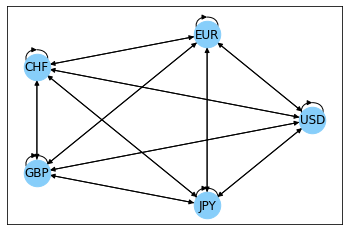

In [ ]:
G = nx.DiGraph()

for i in log_mtx.index:
  for j in log_mtx.columns:
    G.add_edge(i, j, weight= -log_mtx.at[i,j])

path_length, path_nodes, negative_cycle = bf.bellman_ford(G, source='USD', target='USD', weight="weight")
print("Is there a negative cycle?: {0}".format(negative_cycle)) 
print("Shortest path length: {0}".format(path_length)) 
print("Shortest path: {0}".format(path_nodes))

nx.draw_networkx(G, with_labels=True, pos=nx.circular_layout(G), node_size=700, arrowsize=10, node_color='lightskyblue' )
print('\n')

length, nodes, negative_cycle = bf.negative_edge_cycle(G, weight='weight')
print("Is there a negative cycle?: {0}".format(negative_cycle)) 
print("Shortest path length: {0}".format(length)) 
print("Shortest path: {0}".format(nodes[::-1])) 
print("Arbitrage Multiplier: {0}".format(np.exp( -length )) )

Using $\Omega(f(\theta^*))$, we can also show the flow of the maximum normalized weight cycle as follows:

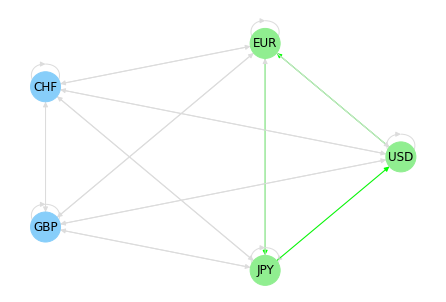

In [ ]:
G = nx.DiGraph()

for i in log_mtx.index: 
  if i in currenc_used:
    G.add_node(i, color='lightgreen') 
  else:
    G.add_node(i, color='lightskyblue') 
  
  for j in log_mtx.columns:
    if (i,j) in omega:
      G.add_edge(i, j, weight=-log_mtx.at[i,j], color='lime')   
    else:
      G.add_edge(i, j, weight=-log_mtx.at[i,j], color='gainsboro' )

colors = nx.get_edge_attributes(G,'color').values()
node_colors = nx.get_node_attributes(G,'color').values()

nx.draw(G, with_labels=True, edge_color=list(colors), pos=nx.circular_layout(G), node_color=list(node_colors) , node_size=900 )


and focusing in solely on those nodes which are involved in the maximum normalized weight cycle, we have

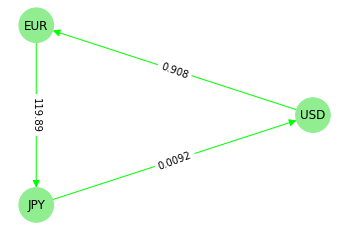

In [ ]:
G = nx.DiGraph()

for i in log_mtx.index: 
  if i in currenc_used:
    G.add_node(i, color='lightgreen') 
  
  for j in log_mtx.columns:
    if (i,j) in omega:
      G.add_edge(i, j, weight= mtx.at[i,j], color='lime')   

colors = nx.get_edge_attributes(G,'color').values()
node_colors = nx.get_node_attributes(G,'color').values()
wts = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G) ,edge_labels=wts )
nx.draw(G, with_labels=True, edge_color=list(colors), pos=nx.circular_layout(G), node_color=list(node_colors), node_size=1_200, arrowsize=15 )

# **Exercise 2: Maximum Absolute Arbitrage**

Below is a similar framework to that presented above for determining the maximum absolute cycle.

In [ ]:
currencies = ['USD', 'EUR', 'GBP', 'JPY', 'CAD']

rates=[ [	0,	     -0.085627,	 -0.198195,	 4.64651,	0.28835],
        [	0.085627,	0,	       -0.112614,	 4.73197,	0.37396],
        [	0.198195,	0.112614,	  0,	       4.84457,	0.48662],
        [	-4.64651,	-4.73197,	 -4.84457,	 0,	     -4.35815],
        [	-0.28835,	-0.37396,	 -0.48662,	 4.35815,	0.     ] ]

log_mtx = pd.DataFrame(rates, index=currencies, columns=currencies)
A = log_mtx.values
np.fill_diagonal(A, -np.inf)

In [ ]:
currencies = log_mtx.index
A = log_mtx.values
np.fill_diagonal(A, -np.inf)
trop_powers_dict = dict()

M = A
power_range = np.arange( 2, A.shape[0] + 1 )
for i in power_range:
  M = vec_trop(M,A)
  trop_powers_dict[i] = M.diagonal()

diags    = pd.DataFrame( trop_powers_dict.values(), columns=currencies, index = power_range )
diags    = diags.loc[3:]                
diags = diags.round(10)
diags = diags[ diags.apply(lambda x : x == x.max(), axis=1).sum(axis=1) == diags.index ]

theta  = diags.max(axis=1).idxmax() 
arb_curr = diags.loc[theta]           
max_diag = arb_curr.max()

arb_curr = arb_curr.round(10)           
arb_curr = arb_curr[arb_curr == arb_curr.max()].index   
np.fill_diagonal(log_mtx.values, 0) 
currenc_used = log_mtx.loc[ list(arb_curr) , list(arb_curr) ] 
arb_rate_pairs = list(itertools.product(currenc_used.columns, currenc_used.index))  
phi = pd.Series( currenc_used.values.flatten() , index=arb_rate_pairs)  
phi = phi[phi != 0]                                       
phi

log_multiplier = max_diag
print( f'Log Arbitrage Multiplier {log_multiplier}' )
print( f'Arbitrage Multiplier {np.exp(log_multiplier)}' )

m = gp.Model('currency_arbitrage')
upsilon = m.addVars(phi.index, vtype=GRB.BINARY, lb=0, ub=1, name='upsilon')

obj = gp.quicksum(upsilon[d]*phi[d] for d in phi.index ) 

m.addConstr( obj == log_multiplier )  
m.setObjective( obj, GRB.MINIMIZE)
m.optimize()
upsilon

Log Arbitrage Multiplier 0.000232
Arbitrage Multiplier 1.0002320269140814
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0xa2a1428c
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [9e-02, 5e+00]
  Objective range  [9e-02, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-04, 2e-04]
Presolve removed 0 rows and 10 columns
Presolve time: 0.00s
Presolved: 1 rows, 10 columns, 10 nonzeros
Variable types: 0 continuous, 10 integer (0 binary)

Root relaxation: objective 2.320000e-04, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00023    0    1          -    0.00023      -     -    0s
     0     0    0.00023 

{('CAD', 'EUR'): <gurobi.Var upsilon[CAD,EUR] (value 0.0)>,
 ('CAD', 'GBP'): <gurobi.Var upsilon[CAD,GBP] (value 0.0)>,
 ('CAD', 'JPY'): <gurobi.Var upsilon[CAD,JPY] (value 1.0)>,
 ('CAD', 'USD'): <gurobi.Var upsilon[CAD,USD] (value 0.0)>,
 ('EUR', 'CAD'): <gurobi.Var upsilon[EUR,CAD] (value 0.0)>,
 ('EUR', 'GBP'): <gurobi.Var upsilon[EUR,GBP] (value 0.0)>,
 ('EUR', 'JPY'): <gurobi.Var upsilon[EUR,JPY] (value 0.0)>,
 ('EUR', 'USD'): <gurobi.Var upsilon[EUR,USD] (value 1.0)>,
 ('GBP', 'CAD'): <gurobi.Var upsilon[GBP,CAD] (value 1.0)>,
 ('GBP', 'EUR'): <gurobi.Var upsilon[GBP,EUR] (value 0.0)>,
 ('GBP', 'JPY'): <gurobi.Var upsilon[GBP,JPY] (value 0.0)>,
 ('GBP', 'USD'): <gurobi.Var upsilon[GBP,USD] (value 0.0)>,
 ('JPY', 'CAD'): <gurobi.Var upsilon[JPY,CAD] (value 0.0)>,
 ('JPY', 'EUR'): <gurobi.Var upsilon[JPY,EUR] (value 1.0)>,
 ('JPY', 'GBP'): <gurobi.Var upsilon[JPY,GBP] (value 0.0)>,
 ('JPY', 'USD'): <gurobi.Var upsilon[JPY,USD] (value 0.0)>,
 ('USD', 'CAD'): <gurobi.Var upsilon[USD

In [ ]:
omega = []
for k in upsilon.keys():
  if upsilon[k].x == 1:
    omega.append( k )
  
start_point = random.choice( currenc_used.index )
multiplier = 1
denom = start_point

print(f'{multiplier} {denom} -->', end=' ')
for c in range( len(currenc_used.index) ):
  print( f'{dict(omega)[denom]} -->' , end=' ' )
  multiplier *= np.exp( log_mtx.at[denom , dict(omega)[denom] ] )
  denom = dict(omega)[denom]

print(f'{multiplier} {start_point}')

1 JPY --> EUR --> USD --> GBP --> CAD --> JPY --> 1.000232026914082 JPY


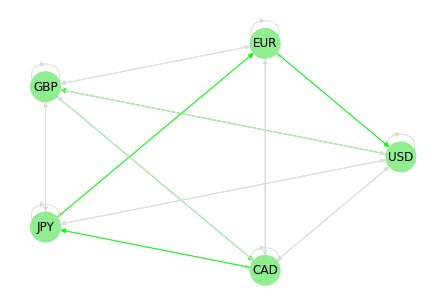

In [ ]:
G = nx.DiGraph()

for i in log_mtx.index: 
  if i in currenc_used:
    G.add_node(i, color='lightgreen') 
  else:
    G.add_node(i, color='lightskyblue') 
  
  for j in log_mtx.columns:
    if (i,j) in omega:
      G.add_edge(i, j, weight=-log_mtx.at[i,j], color='lime')   
    else:
      G.add_edge(i, j, weight=-log_mtx.at[i,j], color='gainsboro' )

colors = nx.get_edge_attributes(G,'color').values()
node_colors = nx.get_node_attributes(G,'color').values()

nx.draw(G, with_labels=True, edge_color=list(colors), pos=nx.circular_layout(G), node_color=list(node_colors), node_size=900 )

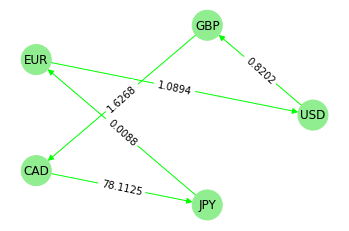

In [ ]:
G = nx.DiGraph()

for i in log_mtx.index: 
  if i in currenc_used:
    G.add_node(i, color='lightgreen') 
  
  for j in log_mtx.columns:
    if (i,j) in omega:
      G.add_edge(i, j, weight= round( np.exp(log_mtx.at[i,j]) , 4 ), color='lime')   

colors = nx.get_edge_attributes(G,'color').values()
node_colors = nx.get_node_attributes(G,'color').values()
wts = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G) ,edge_labels=wts )
nx.draw(G, with_labels=True, edge_color=list(colors), pos=nx.circular_layout(G), node_color=list(node_colors), node_size=900, arrowsize=12 )

# **Appendix**

### **Appendix A) Tropical Polynomials and Curves**

In [93]:
import pandas as pd
import numpy as np
from numpy import linalg as LA

import timeit
import random
import itertools
import matplotlib.pyplot as plt

from IPython.display import display, Math
from pylab import *

! pip install gurobipy
import gurobipy as gp
from gurobipy import GRB


! pip install latex
#plt.rcParams['text.usetex'] = True

As mentioned earlier, the min-plus semi-ring is defined as $\mathbb{R}_{min} = \mathbb{R} \, \cup$ \{$\infty$\} where, $a \, \otimes' \, b \,:=$ $a\,+\,b$ and $\, a \, \oplus' \, b \,:=$ min{a,b}. Going forward, $\oplus'$and $\otimes '$ will be used to refer to tropical addition and multiplication under the min-plus semi-ring respectively. Besides this distinction, all other applications derivative of addition and multiplication discussed in **section 2** behave analogously to their max-plus counterparts.

Consider the tropical polynomials $p(x) = \bigoplus_{i=1}^{n} a_i x^i = max_{i=1}^n(a_i + ix) \,$ and $\, q(x) = {\bigoplus ^{'}}_{i=1}^{n} a_i x^i = min_{i=1}^n(a_i + ix)$. Below we can see that for all $i \in {\mathbb{R}_{\geq 1}} \,$, $p(x)$ is convex and $q(x)$ is concave.

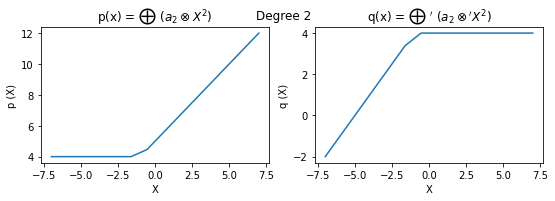

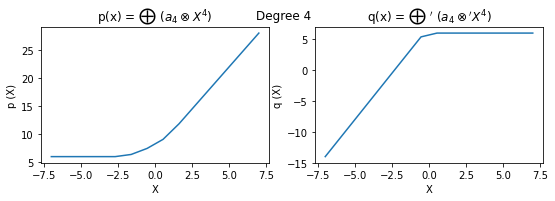

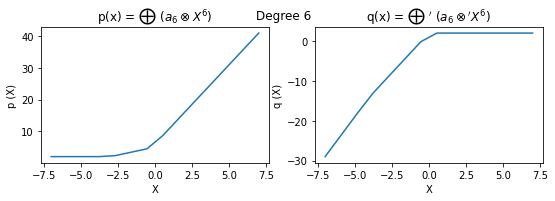

In [2]:
def trop_poly(A, X, max_plus=True):
  
  A = pd.Series(A)
  X = pd.Series(X)
  
  poly_func = lambda x : A + x*A.index
  vec_func = np.vectorize(poly_func)
  p = X.apply(vec_func) 
  
  if max_plus==True:  
    p = p.apply(lambda x : x.max() )
    p = p.values
  else:      
    p = p.apply(lambda x : x.min() )
    p = p.values
  return p

for i in np.arange(2,6+1,step=2):
  n = i
  X = np.linspace(-7,7, abs(7*2))
  A = np.random.randint(low=1, high=9, size = n )

  Y_minplus = trop_poly(A, X, max_plus=False)
  Y_maxplus = trop_poly(A, X, max_plus=True)

  fig, axs = plt.subplots(1,2, figsize=(9, 2.5) )
  fig.suptitle(f"Degree {n}")
  axs[0].title.set_text(rf"""p(x) = $\bigoplus$ ($a_{i} \otimes X^{i}$)""")
  axs[0].set_xlabel('X')
  axs[0].set_ylabel('p (X)')
  axs[0].plot(X, Y_maxplus)

  axs[1].title.set_text(rf"""q(x) = $\bigoplus$ $'$ ($a_{i} \otimes' X^{i}$)""")
  axs[1].set_xlabel('X')
  axs[1].set_ylabel('q (X)')
  axs[1].plot(X, Y_minplus)

Similarly to classical geometry, we might be interested in knowing the roots of the tropical polynomial given by $q(x)$. Tropical polynomials are simply piecewise linear functions, and roots therefore occur at the intersection of two pieces (i.e., at a corner). The roots are given by all points $x_0$ in the domain of $q(x)$ for which there is corner at $x_0$. The order of a root is given by the difference in the slopes of the pieces which meet at a corner. **[2] [8]**

For $q_1(x) = \bigoplus '(2 \otimes' x^0 , 0 \otimes' x^1) = min(2, x)$ and $q_2 (x) = \bigoplus '(0 \otimes' x^0 , \infty \otimes' x^1, 0 \otimes' x^2 ) = min(0,\infty, 2x)$
,we can observe below that $q_1(x)$ has a simple root at $x_0=1$ and $q_2(x)$ has a double root at $x_0=0$.

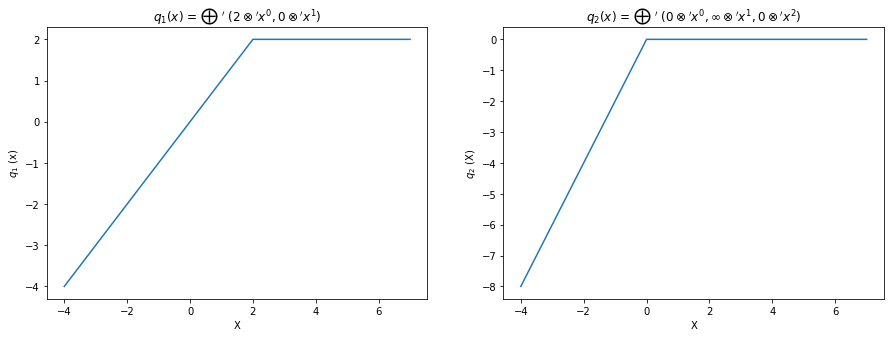

In [3]:
X = np.arange(-4,8)
A = np.array([2,0])
p1 = trop_poly(A, X, max_plus=False)

X = np.arange(-4,8)
A = np.array([0,np.inf,0])
p2 = trop_poly(A, X, max_plus=False)

fig, axs = plt.subplots(1,2, figsize=(15, 5) )
axs[0].title.set_text(rf"""$q_1(x)$ = $\bigoplus$ $'$ ($2 \otimes' x^0 , 0 \otimes' x^1$)""")
axs[0].set_xlabel('X')
axs[0].set_ylabel('$q_1$ (x)')
axs[0].plot(X, p1)

axs[1].title.set_text(rf"""$q_2(x)$ = $\bigoplus$ $'$ ($0 \otimes' x^0 , \infty \otimes' x^1, 0 \otimes' x^2$)""")
axs[1].set_xlabel('X')
axs[1].set_ylabel('$q_2$ (X)')
axs[1].plot(X, p2)

We can also verify this programmatically below

In [4]:
def poly_roots(p, X):
  slope = np.diff(p) / np.diff(X)
  orders = abs(np.diff(slope))
  
  for i in np.unique(orders[orders != 0]):
    R = np.where(orders == i)[0]  
    print(f'order {int(i)} root(s):')
    
    for i in X[R+1]:
      print( f'x_0 = {i}')   

X = np.arange(-4,8)

A = np.array([2,0])
p1 = trop_poly(A, X, max_plus=False)
print('q_1(x)')
poly_roots(p1,X)
print('\n')
print('q_2(x)')
A = np.array([0,np.inf,0])
p2 = trop_poly(A, X, max_plus=False)
poly_roots(p2,X)

q_1(x)
order 1 root(s):
x_0 = 2


q_2(x)
order 2 root(s):
x_0 = 0


Now let 

$p(x,y) = \bigoplus_{i,j} (\, 0, x_{i,j}, y_{i,j}\,) = max_{i,j}(0, x_{i,j}, y_{i,j})$

and

$q(x,y) = \bigoplus'_{i,j}  (\, 0, x_{i,j}, y_{i,j}\,) = min_{i,j}(0, x_{i,j}, y_{i,j})$.


Here $p(x,y)$ and $q(x,y)$ are convex and concave piecewise linear functions, respectively, whose graphs we call tropical curves. Looking at $q(x,y)$, notice that, for all $y_{i,j} = 0 < x_{i,j}, \, q(x_{i,j},y_{i,j}) = min(0, x_{i,j}, 0) = 0$. Similarly, for all $\, x_{i,j} = 0 < y_{i,j} , \, q(x_{i,j},y_{i,j}) = min(0, 0, y_{i,j}) = 0$. 

These conditions both create scenarios in which the minimum value given by $q(x,y)$ is obtained twice among the three inputs. We also have, for all $y_{i,j} = x_{i,j} < 0$, $\, q(x_{i,j},y_{i,j}) = min(0, x_{i,j}, y_{i,j}) = x_{i,j} = y_{i,j}$.

These scenarios, where the output of $q(x,y)$ is obtained by at least two of the inputs, give us the points of a tropical curve. Another defining characteristic of a tropical curve is the corner locus (**represented by an orange dot below in both figures**) where the minimum is obtained three times, which occurs at $x_{i,j} = y_{i,j}=0$.

The figures below show the tropical curves given by $p(x,y)$ (**left**) and $q(x,y)$ (**right**). The points of tropical curve are given by the blue half-lines which intersect at corner locus, and each region the curve divides the plane in $\mathbb{R}^2$ into represents the conditions for which one of the three unique inputs are obtained by the corresponding polynomial. **[2] [8]**

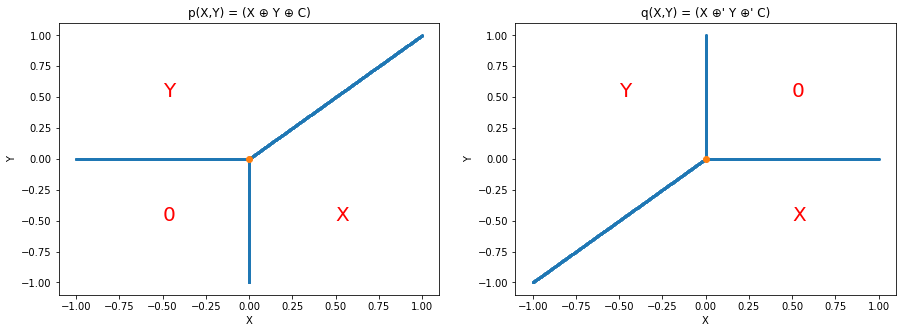

In [5]:
def trop_line(max_plus=True):
  x = set( np.linspace(-1,1,1_000) ) | set([0])
  y = set( np.linspace(-1,1,1_000) ) | set([0])

  ind = [x,y]
  c = 0
  Z = pd.DataFrame( None, index=pd.MultiIndex.from_product([x,y]) )
  Z['c'] = c
  Z['x'] = Z.index.get_level_values(0)
  Z['y'] = Z.index.get_level_values(1)

  if max_plus:
    boundary = Z.eq(Z.max(axis=1).values, axis='index')
  else:
    boundary = Z.eq(Z.min(axis=1).values, axis='index')
  boundary = boundary.sum(axis=1)
  boundary = boundary[boundary >= 2]#.index
  corner_locus = boundary[boundary==3]

  x_b  = boundary.index.get_level_values(0)
  y_b  = boundary.index.get_level_values(1)
  x_cl = corner_locus.index.get_level_values(0)
  y_cl = corner_locus.index.get_level_values(1)
  return x_b, y_b, x_cl, y_cl

x_b_max, y_b_max, x_cl_max, y_cl_max = trop_line(max_plus=True)
x_b_min, y_b_min, x_cl_min, y_cl_min = trop_line(max_plus=False)

fig, axs = plt.subplots(1,2, figsize=(15, 5) )
axs[0].text(-0.5, 0.5, 'Y', color="r", fontsize=20)
axs[0].text(0.5, -0.5, 'X', color="r", fontsize=20)
axs[0].text(-0.5, -0.5, '0', color="r", fontsize=20)
axs[0].title.set_text(r"""p(X,Y) = (X ⊕ Y ⊕ C)""")
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].scatter(x_b_max, y_b_max, s=2**2)
axs[0].scatter(x_cl_max, y_cl_max)

axs[1].text(-0.5, 0.5, 'Y', color="r", fontsize=20)
axs[1].text(0.5, -0.5, 'X', color="r", fontsize=20)
axs[1].text(0.5, 0.5, '0', color="r", fontsize=20)
axs[1].title.set_text(r"""q(X,Y) = (X ⊕' Y ⊕' C)""")
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].scatter(x_b_min, y_b_min, s=2**2)
axs[1].scatter(x_cl_min, y_cl_min)

Solving for the tropical curve is a matter of finding the points ($X_0, Y_0$) in $\mathbb{R}^2$ which solve one of following system of equations below:

$X_0 = Y_0 \leq 0, \,\,\,\,\,\, X_0 = 0 \leq Y_0, \,\,\,\,\,\, Y_0 = 0 \leq X_0 $.

The half-lines which intersect at the corner locus are thus given by:

$\{ (X, X) \,|\, X \leq 0 \}, \{ (0,Y) \,|\, Y \geq 0 \}, \{ (X,0) \,|\, X \geq 0 \}$ 

which we can verify graphically below. **[2] [8]**

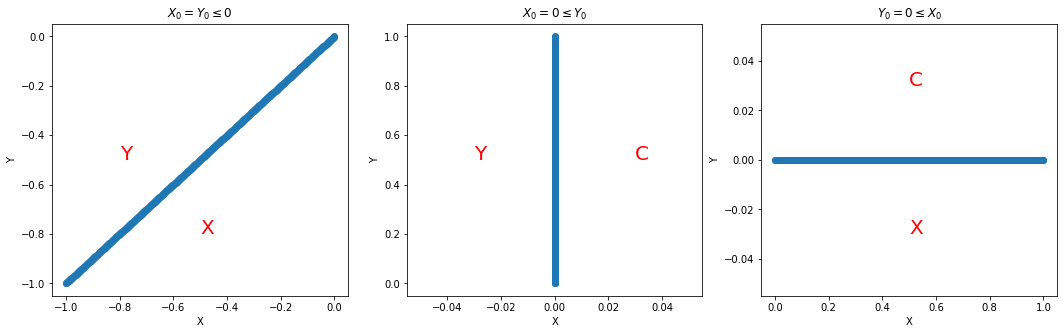

In [6]:
def trop_hl_plot(max_plus=True):

  x = set( np.linspace(-1,1,1_000) ) | set([0])
  y = set( np.linspace(-1,1,1_000) ) | set([0])
  c = 0

  ind = [x,y]
  Z = pd.DataFrame( None, index=pd.MultiIndex.from_product([x,y]) )
  Z['c'] = c
  Z['x'] = Z.index.get_level_values(0)
  Z['y'] = Z.index.get_level_values(1)

  def trop_hl(df, in_1, in_2):
    if max_plus==True:
      hl = Z[(Z[f'{in_1}'] == Z.max(axis=1)) & (Z[f'{in_2}'] == Z.max(axis=1))  ]
    else:
      hl = Z[(Z[f'{in_1}'] == Z.min(axis=1)) & (Z[f'{in_2}'] == Z.min(axis=1))  ]
    hl_x = hl.index.get_level_values(0)
    hl_y = hl.index.get_level_values(1)
    return hl_x, hl_y
  hl_1_x, hl_1_y = trop_hl(df=Z, in_1='x', in_2='y')
  hl_2_x, hl_2_y = trop_hl(df=Z, in_1='x', in_2='c')
  hl_3_x, hl_3_y = trop_hl(df=Z, in_1='y', in_2='c')

  fig, axs = plt.subplots(1,3, figsize=(18, 5) )

  if max_plus == True:
    axs[0].title.set_text(rf"""$X_0 = Y_0 \geq 0$)""")
    axs[0].text(0.5, 0.8, 'Y', color="r", fontsize=20)
    axs[0].text(0.8, 0.5, 'X', color="r", fontsize=20)

    axs[1].title.set_text(rf"""$X_0 = 0 \geq Y_0$)""")
    axs[1].text(-0.03, -0.5, 'C', color="r", fontsize=20)
    axs[1].text(0.03, -0.5, 'X', color="r", fontsize=20)

    axs[2].title.set_text(rf"""$Y_0 = 0 \geq X_0$)""")
    axs[2].text(-0.5, -0.03, 'C', color="r", fontsize=20)
    axs[2].text(-0.5, 0.03, 'Y', color="r", fontsize=20)

  else:
    axs[0].title.set_text(rf"""$X_0 = Y_0 \leq 0$""")
    axs[0].text(-0.5, -0.8, 'X', color="r", fontsize=20)
    axs[0].text(-0.8, -0.5, 'Y', color="r", fontsize=20)

    axs[1].title.set_text(rf"""$X_0 = 0 \leq Y_0$""")
    axs[1].text(-0.03, 0.5, 'Y', color="r", fontsize=20)
    axs[1].text(0.03, 0.5, 'C', color="r", fontsize=20)

    axs[2].title.set_text(rf"""$Y_0 = 0 \leq X_0$""")
    axs[2].text(0.5, -0.03, 'X', color="r", fontsize=20)
    axs[2].text(0.5, 0.03, 'C', color="r", fontsize=20)

  axs[0].set_xlabel('X')
  axs[0].set_ylabel('Y')
  axs[0].scatter(hl_1_x, hl_1_y)

  axs[1].set_xlabel('X')
  axs[1].set_ylabel('Y')
  axs[1].scatter(hl_2_x, hl_2_y)

  axs[2].set_xlabel('X')
  axs[2].set_ylabel('Y')
  axs[2].scatter(hl_3_x, hl_3_y)

trop_hl_plot(max_plus=False)

As tropical geometry remains an emerging field in mathematics, its discovered practical applications in economics remain sparse. One highly renown application of tropical geometry was developed by **Paul Klemperer** while designing an auction in which the Bank of England could lend capital to financial institutions experiencing varying degrees of distress during the Global Financial Crisis. This type of auction is referred to as the **product mix auction**, and the remainder of the appendix will be devoted to discussing product mix auctions, but those further interested in this topic should read **[5]**. 

### **Appendix B) Product Mix Auctions**

The product mix is a well-known type of optimization problem in which we must maximize our utility functions, when facing supply constraints, by solving for the number of units of each type of good to produce. Decisions here are made at the margin. For example, a baker who produces only cakes and muffins must evaluate whether they derive more utility from using their last bag of flour to produce a dozen muffins or one cake. 

During the Global Financial Crisis, the Bank of England faced a similar problem in which they needed to produce two broad categories of loans: those that were well-collateralized and those that were less well-collateralized. The bank needed to find the market-clearing interest rate (aka price) they would charge for each type of loan in order to maximize its utility function.

To keep the context simpler, we will consider an auction for only two types of goods: apples and bananas.

Product mix auctions are short, simple and centralized. Separate auctions for individual goods can be costly for both buyers and sellers to manage, and Klemperer's solution to such is one centralized auction where market-clearing prices and allocations are determined simultaneously for one or more goods. Centrality here safeguards against collusion and manipulation that we might otherwise observe in single-good, fragmented auctions **[5]**. This type of auction is designed to make price discovery more frictionless by making the bidding environment more competitive, which can be achieved by bringing the bidders together and centralizing information about their preferences. Bidders in a competitive equilibrium will bid truthfully if they perceive themselves as not having sufficient market power to manipulate prices.

 The rules of the auction are as follows:

*   There is only one round of bidding for all goods up for auction.

*   Bidders can bid on one or multiple goods simultaneously.

*   A valid bid must consist of a reserve price for each good and a single quantity desired at all reserve prices in the bid (those bidders who do not desire one or more of the goods up for auction would indicate so with reserve price(s) of zero for that subset of goods).

*   The auctioneer chooses one market-clearing price for each good after analyzing all the bids, in conjunction with the seller's supply curve. 

*   Each bid receives, at most, one good, provided at least one reserve price is at least as great as the market-clearing price chosen by the auctioneer.

*   Which good a bid receives (in the event one or more reserve prices equal or exceed their respective market-clearing prices) is determined by which good provides the bidder with the greatest net surplus (or the difference between the reserve price and the market-clearing price)

*   All bids, to which a particular good is allocated, pay a uniform price for said good.

*   A bidder may submit multiple bids for one or more goods. The auctioneer considers only the bid itself, rather than the bidder, in determining allocations and market-clearing prices.

*   A bid to which a good is allocated will receive at least one unit of the good and at most the number of units specified in the bid.

We will operate in a simple environment in which there are one or more bidders and only one seller. Adaptations, however, can be applied to this environment to accommodate multiple sellers **[5]**.

In this framework, bidders assign valuations to a good in the form of reserve prices, and they would prefer not to buy the good at any price which exceeds their reserve price. The seller, conversely, sets price floors, below which they would prefer not to do business with the bidder(s). Thus, business will be done between the seller and the bidders at any price(s) between the bidders' ceilings and seller's floors.

Since the product mix auction auctions off multiple goods simultaneously, we must consider not only the decision boundary between buying and not buying a particular good, but the decision boundary between preferring that good over any other one (in the event both valuations equal or exceed their respective market-clearing prices) as well.

Suppose a bidder assigns a valuation of $b_a =$ \$60 for an apple and $b_b =$ \$50 for a banana. We can therefore deduce the following about the bidder's preferences if the auctioneer chooses a price of $p_a$ for apples and $p_b$ for bananas.

*  If $p_a > b_a$ and $p_b > b_b$, the bidder would prefer not to buy either good.

*  If $p_a \leq b_a$ and $p_b \leq b_b$, the bidder would prefer to buy an apple if $p_a - p_b \leq b_a - b_b = 10$, and would otherwise prefer to buy a banana.

*  If $p_a > b_a$ and $p_b \leq b_b$, the bidder would prefer to buy a banana.

*  If $p_b > b_b$ and $p_a \leq b_a$, the bidder would prefer to buy an apple.


Put simply, the bidder wants to buy whichever good yields them the greatest value (where value is defined as $b_i - p_i$ for good $i$). Graphing these preferences in the form of the indifference boundaries in **figure 1a**, we can see they resemble a min-plus tropical curve from earlier. The corner locus of this curve is thus given by the bidder's valuation of [60,50].

For completeness, consider the perspective of the seller, who chooses a selling price of $p_a =$ \$60 for an apple and $p_b =$ \$50 for a banana. The seller's preferences are as follows if a bidder submits a bid in the form of the vector **[$b_a,b_b,1$]** (the third element here representing the desire for one unit of either good):

*  If $p_a > b_a$ and $p_b > b_b$, the seller would reject the bid entirely and not allocate either good to the bid.

*  If $p_a \leq b_a$ and $p_b \leq b_b$, the seller would accept the bid and allocate to it an apple if $b_a - p_a \geq b_b - p_b$, and would otherwise allocate one banana to it.

*  If $p_a > b_a$ and $p_b \leq b_b$, the seller would allocate one banana to the bid.

*  If $p_b > b_b$ and $p_a \leq b_a$, the seller would allocate one apple to the bid.

We can graph these preferences in **figure 1b** as we did for the bidder and see that the seller's preferences can be expressed as a max-plus tropical polynomial. The seller's ultimate goal here is to charge the highest prices at which they can sell the level of inventory they want to. 

The auctioneer's role is to determine a market-clearing price for all goods up for auction, after aggregating information about both the bidders' and seller's preferences. The auctioneer allocates goods to bidders based on whichever good yields a given bidder the maximum value (or net surplus).

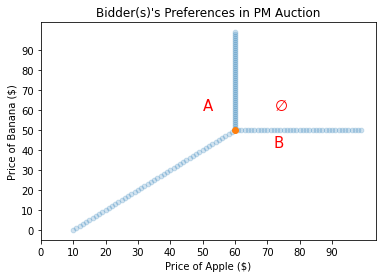

In [7]:
def pma_bid(ba, bb, bidders=True, regions=False, reg_color='r'):
  pa = set( np.arange(0,100,1) ) | set([ba])
  pb = set( np.arange(0,100,1) ) | set([bb])

  ind = [pa,pb]
  c = min(ba,bb)
  
  price_space = pd.DataFrame( None, index=pd.MultiIndex.from_product([pa,pb]) )
  price_space['c'] = c
  
  if ba >= bb:
    price_space['pa'] = price_space.index.get_level_values(0) - (ba-bb)
    price_space['pb'] = price_space.index.get_level_values(1) 
  else:
    price_space['pa'] = price_space.index.get_level_values(0) 
    price_space['pb'] = price_space.index.get_level_values(1) - (bb-ba)

  if bidders:
    boundary = price_space.eq(price_space.min(axis=1).values, axis='index')
    perspective='Bidder(s)'
    x_cord_a = min(ba/1.2, ba-5) 
    y_cord_a = max(bb*1.2,bb+5) 
    x_cord_b = max(ba*1.2,ba+5) 
    y_cord_b = min(bb/1.2,bb-5) 
    x_cord_null = max(ba*1.2,ba+5) 
    y_cord_null = max(bb*1.2,bb+5)
  else:
    boundary = price_space.eq(price_space.max(axis=1).values, axis='index')
    perspective='Seller'
    x_cord_a = max(ba*1.2,ba+5)
    y_cord_a = min(bb/1.2,bb-5)
    x_cord_b = min(ba/1.2,ba-5)
    y_cord_b = max(bb*1.2,bb+5)
    x_cord_null = min(ba/1.2,bb-5)
    y_cord_null = min(bb/1.2,bb-5)

  boundary = boundary.sum(axis=1)
  boundary = boundary[boundary >= 2]
  corner_locus = boundary[boundary==3]

  plt.scatter(boundary.index.get_level_values(0), boundary.index.get_level_values(1),alpha=0.2, s=2**4.5 )
  plt.scatter(corner_locus.index.get_level_values(0), corner_locus.index.get_level_values(1), alpha=1)
  plt.xticks(np.arange(min(pa), max(pa)+1, 10))
  plt.yticks(np.arange(min(pb), max(pb)+1, 10))
  plt.title(f"""{perspective}'s Preferences in PM Auction""")
  plt.ylabel('Price of Banana ($)')
  plt.xlabel('Price of Apple ($)')
  if regions:
    plt.text(x_cord_a, y_cord_a, 'A', color=reg_color, fontsize=15)
    plt.text(x_cord_b, y_cord_b, 'B', color=reg_color, fontsize=15)
    plt.text(x_cord_null, y_cord_null, '$\emptyset$', color=reg_color, fontsize=15)
  

ba = 60 #bid price for an apple 
bb = 50 #bid price for a banana
pma_bid(ba, bb,bidders=True,regions=True)
plt.show()

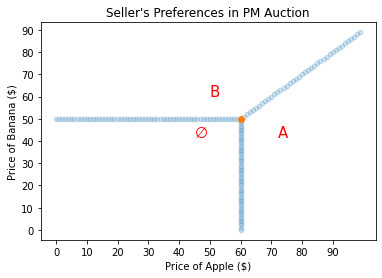

In [8]:
pma_bid(ba, bb,bidders=False,regions=True)
plt.show()

Suppose the auctioneer receives the following bids which take the form **$[b_a \, \, b_b \, \, Q]$**:

\begin{bmatrix}
  56 & 57  & 25 \\
\end{bmatrix}

\begin{bmatrix}
  30 & 50  & 24 \\
\end{bmatrix}

\begin{bmatrix}
  21 & 3  & 12 \\
\end{bmatrix}

\begin{bmatrix}
  85 & 40  & 12 \\
\end{bmatrix} 

\begin{bmatrix}
  26 & 39  & 23 \\
\end{bmatrix} 

\begin{bmatrix}
  58 & 63  & 21 \\
\end{bmatrix} 

\begin{bmatrix}
  35 & 58  & 9 \\
\end{bmatrix} 

\begin{bmatrix}
  38 & 57  & 20 \\
\end{bmatrix}     
                  
\begin{bmatrix}
  46 & 17  & 20 \\
\end{bmatrix} 

\begin{bmatrix}
  59 & 36  & 34 \\
\end{bmatrix}       

. **Figure 2** indicates which bids would be accepted and rejected by green dots and red dots respectively given $p_a = 60$ and $p_b = 50$. Depending on the amount of inventory the seller is willing to sell, these bids may not receive the entirety of their desired quantities, but will receive at least one unit. 

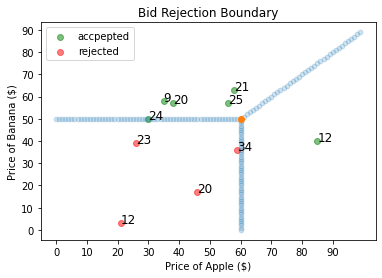

In [9]:
pa = set( np.arange(0,100,1) ) | set([ba])
pb = set( np.arange(0,100,1) ) | set([bb])

ba = 60 #bid for apple 
bb = 50 #bid for banana

price_space = pd.DataFrame( None, index=pd.MultiIndex.from_product([pa,pb]) )

bids = np.array([ [56,57,25],
                  [30,50,24],
                  [21,3,12],
                  [85,40,12],
                  [26,39,23],
                  [58,63,21],
                  [35,58,9],
                  [38,57,20],
                  [46,17,20],
                  [59,36,34] ])

bids = pd.DataFrame(bids, index = np.arange(1, bids.shape[0] + 1, 1), columns=['A', 'B', 'Q'])
win_bids_a = bids[bids.A >= ba]
win_bids_b = bids[bids.B >= bb]
lose_bids = bids[(bids.A<ba)&(bids.B<bb)]

plt.scatter(win_bids_a.A, win_bids_a.B, alpha=0.5, c='g',label='accpepted')
plt.scatter(win_bids_b.A, win_bids_b.B, alpha=0.5, c='g')
plt.scatter(lose_bids.A, lose_bids.B, alpha=0.5, c='r', label='rejected')
for i, txt in enumerate(bids.Q):
    plt.annotate(str(txt), ( bids['A'].iloc[i] , bids['B'].iloc[i] ) , fontsize=12)

pma_bid(ba, bb, bidders=False)
plt.title('Bid Rejection Boundary')
plt.legend()
plt.show()

Recall from our initial example above that $p_a = b_a$ and $p_b = b_b$ and therefore the price vector of [$60$,$50$] is the optimal point at which the bidder and seller could do business. Thinking about this interaction between the buyer and seller as a Cartesian plane (ignoring the diagonal boundaries momentarily) whose origin is given by the corner locus common to both tropical curves depicted below, we can observe the following:
* in quadrant 1 the seller's offer is too high for the bidder, 

* in quadrant 3 the bidder's bid is too low for the seller,

* in quadrant 2 the bidder's price for a banana is sufficiently high, but the bidder would prefer an apple,

* and in quadrant 4 the bidder's price for an apple is sufficiently high, but the bidder would prefer a banana.

The auctioneer would therefore choose the auction price which best reflects the preferences of both the buyers and sellers, which would be at the origin of the plane in this case (pictured as the red dot in **figure 3**).

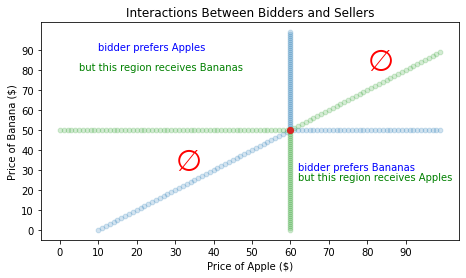

In [10]:
ba = 60 #bid price for an apple 
bb = 50 #bid price for a banana
plt.rcParams["figure.figsize"] = (7.5,4)
pma_bid(ba, bb,bidders=True,regions=False) 
pma_bid(ba, bb,bidders=False,regions=False)


plt.text(10, 90, 'bidder prefers Apples', color='b', fontsize=10)
plt.text(5, 80, 'but this region receives Bananas', color='g', fontsize=10)

plt.text(62, 30, 'bidder prefers Bananas', color='b', fontsize=10)
plt.text(62, 25, 'but this region receives Apples', color='g', fontsize=10)

plt.text(30, 30, '$\emptyset$', color='r', fontsize=30)
plt.text(80, 80, '$\emptyset$', color='r', fontsize=30)

plt.title('Interactions Between Bidders and Sellers')
plt.show()

Suppose now that the bidder's and seller's preferences do not perfectly overlap. Given $b_a=55, b_b=76, p_a=50$ and $p_b=60$, both of the bidder's reserve prices clear the seller's offers, but the bidder would prefer bananas here given $b_b-p_b = 16 > b_a - p_a = 5$. The purple region in **figure 4a** shows the feasible set of prices that satisfy both parties' preferences.

Now suppose $b_a=60, b_b=50, p_a=50$ and $p_b=60$. The bidder's bid for a banana does not clear the market price, but **figure 4b** shows the feasible region in which the two parties could exchange an apple.

For a constant marginal rate of substitution between the two goods ($b_a = p_a + ϵ$ and $b_b = p_b + ϵ$), the feasible region is simply the line segment between the corner loci of the curves given by the bidder's and seller's preferences.

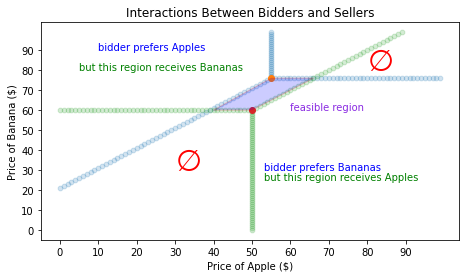

In [11]:
ba_1 = 55 #bid price for an apple 
bb_1 = 76 #bid price for a banana
pma_bid(ba_1, bb_1,bidders=True,regions=False) 
#bidders price clears apples, but banana

ba_2 = 50 #sell price for an apple 
bb_2 = 60 #sell price for a banana
pma_bid(ba_2, bb_2,bidders=False,regions=False)
plt.title('Interactions Between Bidders and Sellers')
fill([ba_1,40,ba_2,66], [bb_1,60,bb_2,76], 'b', alpha=0.2, edgecolor='r')

plt.text(30, 30, '$\emptyset$', color='r', fontsize=30)
plt.text(80, 80, '$\emptyset$', color='r', fontsize=30)

plt.text(10, 90, 'bidder prefers Apples', color='b', fontsize=10)
plt.text(5, 80, 'but this region receives Bananas', color='g', fontsize=10)

plt.text(53, 30, 'bidder prefers Bananas', color='b', fontsize=10)
plt.text(53, 25, 'but this region receives Apples', color='g', fontsize=10)

plt.text(60, 60, 'feasible region', color='blueviolet', fontsize=10)

plt.show()

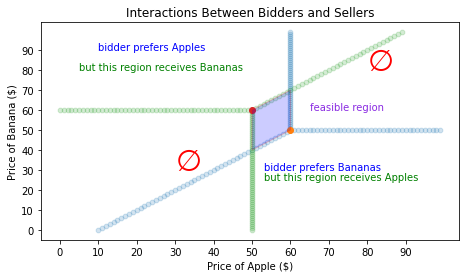

In [12]:
ba_1 = 60 #bid price for an apple 
bb_1 = 50 #bid price for a banana
pma_bid(ba_1, bb_1,bidders=True,regions=False) 

ba_2 = 50 #sell price for an apple 
bb_2 = 60 #sell price for a banana
pma_bid(ba_2, bb_2,bidders=False,regions=False)
plt.title('Interactions Between Bidders and Sellers')
fill([ba_1,50,ba_2,60], [bb_1,40,bb_2,70], 'b', alpha=0.2, edgecolor='r')

plt.text(30, 30, '$\emptyset$', color='r', fontsize=30)
plt.text(80, 80, '$\emptyset$', color='r', fontsize=30)

plt.text(10, 90, 'bidder prefers Apples', color='b', fontsize=10)
plt.text(5, 80, 'but this region receives Bananas', color='g', fontsize=10)

plt.text(53, 30, 'bidder prefers Bananas', color='b', fontsize=10)
plt.text(53, 25, 'but this region receives Apples', color='g', fontsize=10)

plt.text(65, 60, 'feasible region', color='blueviolet', fontsize=10)

plt.show()

As we established earlier, a bidder can submit multiple bids and the auctioneer will determine allocations made to each bid irrespective of the bidder's identity. For example, suppose a bidder submits the following bids:

\begin{bmatrix}
  60 & 50 & 1 \\
\end{bmatrix}

\begin{bmatrix}
  10 & 20 & 1 \\
\end{bmatrix}

. Recall again that the third element in the bid vector represents the desired quantity at the preceding reserve prices. If $p_a=60$ and $p_b=40$, then according to **figure 5a**, neither price in the second bid receives any allocation, but the first bid receives a banana. Alternatively, if $p_a=60$ and $p_b=5$, each bid would be allocated a banana, bringing the bidders total inventory to two bananas.

**Figure 5b** shows the aggregate allocation to the bidder as the sum of the individual allocations.

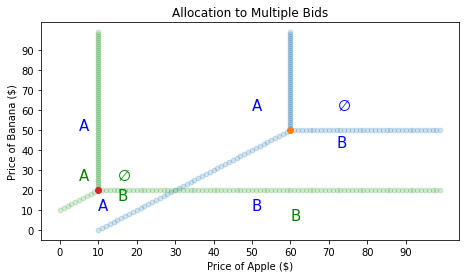

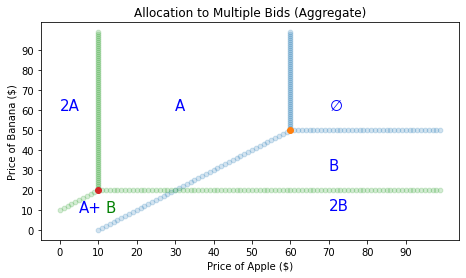

In [14]:
ba = 60 #bid price for an apple 
bb = 50 #bid price for a banana
pma_bid(ba, bb,bidders=True,regions=True,reg_color='b')

ba = 10 #bid price for an apple 
bb = 20 #bid price for a banana 
pma_bid(ba, bb, bidders=True,regions=True,reg_color='g')

plt.text(10, 10, 'A', color="b", fontsize=15)
plt.text(50, 10, 'B', color="b", fontsize=15)
plt.text(60, 5, 'B', color="g", fontsize=15)
plt.text(5, 50, 'A', color="b", fontsize=15)
plt.title('Allocation to Multiple Bids')
plt.show()


ba = 60 #bid price for an apple 
bb = 50 #bid price for a banana
pma_bid(ba, bb,bidders=True,regions=False,reg_color='b')

ba = 10 #bid price for an apple 
bb = 20 #bid price for a banana 
pma_bid(ba, bb, bidders=True,regions=False,reg_color='g')

plt.text(70,60, '$\emptyset$', color='b', fontsize=15)
plt.text(30,60, 'A', color='b', fontsize=15)
plt.text(70,30, 'B', color='b', fontsize=15)
plt.text(70,10, '2B', color='b', fontsize=15)
plt.text(0,60, '2A', color='b', fontsize=15)
plt.text(5,9, 'A+', color='b', fontsize=15)
plt.text(12,9, 'B', color='g', fontsize=15)
plt.title('Allocation to Multiple Bids (Aggregate)')

plt.show()

In [182]:
def submit_bids(pa_low, pa_high, pb_low, pb_high, q_low, q_high, n_bids):
  global bids
  bids = pd.DataFrame(np.array([ np.random.randint(pa_low,pa_high,n_bids) ,
                                 np.random.randint(pb_low,pb_high,n_bids),
                                 np.random.randint(q_low,q_high,n_bids) ]).T, 
                                 columns=['A','B','Q'], index=np.arange(n_bids))

def pm_auction(pa,pb, supply):
  win_bids = bids[ (bids.A.ge(pa)) | (bids.B.ge(pb))  ]
  win_bids = win_bids.copy()
  win_bids['surplus_A'] = np.maximum(0, win_bids.A - pa)
  win_bids['surplus_B'] = np.maximum(0, win_bids.B - pb)
  win_bids['net_surplus'] = np.maximum(win_bids['surplus_A'], win_bids['surplus_B'])
  win_bids.net_surplus 
  
  if sum(win_bids.Q) < supply:
    amount_allocated = 0
    price_diff = 0
    relative_alloc = 0
    return amount_allocated, price_diff, relative_alloc

  m = gp.Model('pm_alloc')
  m.Params.LogToConsole = 0
  alloc = m.addVars(win_bids.index, vtype=GRB.INTEGER, lb=1, name='allocations') 
  obj = gp.quicksum( win_bids.net_surplus[d]*alloc[d] for d in win_bids.index ) 
  m.addConstr( sum(alloc[d] for d in win_bids.index) == supply )
  for d in win_bids.index:
    m.addConstr( alloc[d] <= win_bids.Q[d])
  m.update()
  m.setObjective( obj, GRB.MAXIMIZE)
  m.optimize()

  win_bids['alloc'] = None
  win_bids = win_bids.copy()
  for d in win_bids.index:
    win_bids.loc[d,'alloc'] = alloc[d].x
    
  def good_received(sa,sb):
    if sa >= sb:
      return 'A'
    else:
      return 'B'

  amount_allocated = sum(win_bids.alloc)
  win_bids['good_rec'] = win_bids.apply(lambda x : good_received(x.surplus_A, x.surplus_B),axis=1 )


  relative_alloc = win_bids.groupby('good_rec').sum()['Q']
  try:
    relative_alloc = (relative_alloc.loc['A'] / amount_allocated)
  except:
    relative_alloc = 0
  price_diff = pa-pb
  return amount_allocated, price_diff, relative_alloc


n_bids = 20
pa_low = 10
pa_high = 80
pb_low = 20
pb_high = 60
q_low = 1
q_high = 10
submit_bids(pa_low, pa_high, pb_low, pb_high, q_low, q_high, n_bids)

price_range_a = np.arange(0,100,1) 
price_range_b = np.arange(0,100,1)
supply = 100

q_demand = pd.DataFrame(None, index=price_range_a[::-1], columns=price_range_b) 
price_diff = pd.DataFrame(None, index=price_range_a[::-1], columns=price_range_b) 
relative_q = pd.DataFrame(None, index=price_range_a[::-1], columns=price_range_b) 
vectorized_pm = np.vectorize(pm_auction)

for a in price_range_a:
  q_demand.loc[a], price_diff.loc[a], relative_q.loc[a] = vectorized_pm(a, price_range_b, supply )
q_demand = q_demand.astype('float64')
q_demand


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
99,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,

Using the Cartesian plane of possible combinations from before, we can take some arbitrary point on the plane and travel diagonally, preserving the marginal rate of substitution between goods, until we reach a critical point. To the Northeast of this point, there is not a sufficient quantity demanded among the eligible bids to satisfy the supply constraints, and to the Southwest, the supply constraints might be satisfied, but one or more points to the Northeast would raise more revenue for the auction and would be closer to the bidders' aggregate valuation.

Given an arbitrary matrix of bids, such that the sum of the total quantity demanded is at least as great as the supply offered by the seller, we can compute all possible price combinations that allocate all of the seller's offered inventory to bids, and ensure each allocation is within its corresponding lower and upper bound. For some possible price combination given by $[p_a \,\, p_b]$, suppose we have $n$ eligible bids, whose net-surpluses are given by

$
\, \, \,  \, X=
\begin{bmatrix}
  \oplus(b_{a,1} - p_a, b_{b,1} - p_b)   \\
  \vdots \\
  \oplus(b_{a,n} - p_a, b_{b,n} - p_b)   \\
\end{bmatrix}$

and whose corresponding quantities demanded are given by

$
\, \, \,  \, \textbf{Q}=
\begin{bmatrix}
  Q_1   \\
  \vdots \\
  Q_n 
\end{bmatrix}$

, the optimal allocations to the bids, represented by the vector

$
\, \, \,  \, \lambda=
\begin{bmatrix}
  \lambda_1   \\
  \vdots \\
  \lambda_n   \\
\end{bmatrix}$

, which maximize the bidders' combined net surplus under the supply constraints, are given by

$\underset{\lambda}{\max} X \lambda^{T}$

$\,s.t. \, \, \, \, \, \, \textbf{1} \leq \lambda \leq \textbf{Q}$ 

$\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \sum_{i=1}^{n} \lambda_i = S$

where $S$ is the seller's total inventory.

\
Grouping the set of price combinations which satisfy the constraints above according to marginal rate of substitution, we can find the optimal combination for a given grouping comprised of $k$ combinations with a marginal rate of substitution of $c$ as

$\bigoplus_{i=1}^k (p_{a,i} \otimes p_{b,i}) \, \forall \, p_a - p_b = c $ .

\
Doing so for all such groups gives us the optimal set of feasible (or cutoff) price combinations, with which we can construct the bidders' relative demand curve in **figure 6** (with an arbitrary cutoff price combination superimposed on it).

It is easy to observe that the relative demand for bananas is inversely proportional to the price charged for them by the auctioneer, which gives the relative demand curve its downward-sloping shape. It is also noteworthy that each cutoff price implies both a difference in prices between apples and bananas ($p_a - p_b$), as well as the amount of the seller's inventory allocated to apples normalized by their total inventory ($Q_a / S$ where $Q_a$ is the quantity allocated to apples). **[5]**

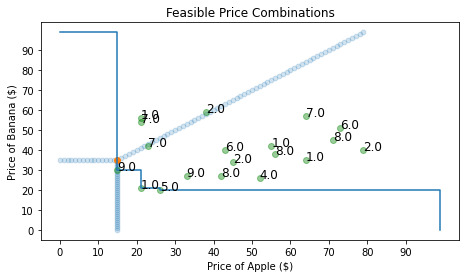

In [183]:
cutoff_prices = pd.DataFrame( None, index=pd.MultiIndex.from_product([q_demand.index, np.repeat(q_demand.columns, len(q_demand.columns) )]) )
cutoff_prices['A'] = cutoff_prices.index.get_level_values(0)
cutoff_prices['B'] = cutoff_prices.index.get_level_values(1)
def f(X):
  return q_demand.at[ X['A'], X['B'] ]
cutoff_prices['Q'] = cutoff_prices.apply(f,axis=1)
cutoff_prices = cutoff_prices[cutoff_prices.Q == supply]
cutoff_prices = cutoff_prices.copy()
cutoff_prices['MR'] = cutoff_prices['A'] - cutoff_prices['B']
cutoff_prices['sum_P'] = cutoff_prices['A'] + cutoff_prices['B']
final = cutoff_prices.groupby('MR').max()
plt.plot(final.A, final.B)

price_select = final.dropna().sample()
ba = price_select.A.values[0]
bb = price_select.B.values[0]
pma_bid(ba, bb, bidders=False)

bids_df = pd.DataFrame(bids, index = np.arange(1, bids.shape[0] + 1, 1), columns=['A', 'B', 'Q'])
bids_df = bids_df[ (bids_df.A.ge(ba)) | (bids_df.B.ge(bb))  ]
plt.scatter(bids_df.A, bids_df.B, alpha=0.4, c='g')
for i, txt in enumerate(bids_df.Q):
    plt.annotate(str(txt), ( bids_df['A'].iloc[i] , bids_df['B'].iloc[i] ) ,fontsize=12 )

plt.title('Feasible Price Combinations')
plt.show()

The other crucial piece of information the auctioneer needs in order to find the market-clearing price(s) is the supply curve, which, in an environment where there is only one seller, is simply given by $f(Q_a/S) = p_a - p_b$. In this case apples and bananas are imperfect substitutes and apples are inferior to bananas (i.e., the seller prefers a higher price relative to bananas as they allocate a larger proportion of their supply to apples). The supply and demand curves are constructed independent of one another **[5]**, and we need only for the supply curve to be upward-sloping and to intersect with the demand curve. It is with this point (depicted as the red dot in **figure 7**) that we can refer back to the plane in **figure 6** to find the price combination that corresponds to the price difference and relative allocation given at the intersection between the supply and demand curves.



q_rel: 0.77
p_diff: -12.0
Market Clearing Price for Apples: 18
Market Clearing Price for Bananas: 30


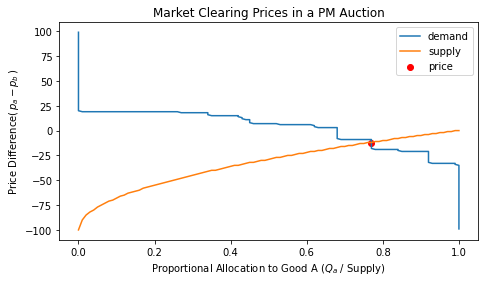

In [185]:
def f2(X):
  return price_diff.at[ X['A'], X['B'] ]
def f3(X):
  return relative_q.at[ X['A'], X['B'] ]

final['p_diff'] = final.apply(f2,axis=1)
final['q_rel'] = final.apply(f3,axis=1)

feas_points = pd.DataFrame(final[['p_diff','q_rel']], columns=['p_diff','q_rel']).reset_index()
fill_vals = { 'q_rel':np.arange(0,1+0.01,0.01) }
fill_vals = pd.DataFrame(fill_vals)
demand_curve = fill_vals.merge(feas_points,on='q_rel',how='left')

demand_curve = demand_curve.sort_values(by=['q_rel','p_diff'],ascending=[True,False])
demand_curve = demand_curve.fillna(method='bfill') 
demand_curve = demand_curve.fillna(method='ffill')
plt.plot(demand_curve.q_rel,demand_curve.p_diff,label='demand')

supply_curve = fill_vals
supply_curve['p_diff'] = supply_curve.q_rel*100 
supply_curve['p_diff'] = np.maximum(supply_curve.q_rel*100, supply_curve.q_rel**(1/2) *100) 
supply_curve['p_diff'] -= 100
supply_curve['p_diff'] = supply_curve['p_diff'].astype('int')

supply_curve['q_rel'] = supply_curve['q_rel'].round(2)
demand_curve['q_rel'] = demand_curve['q_rel'].round(2)

plt.plot(supply_curve.q_rel, supply_curve.p_diff,label='supply')


mcp = pd.merge(demand_curve, supply_curve, how='inner', on=['q_rel','p_diff'])
plt.scatter(mcp.q_rel, mcp.p_diff,label='price',c='r')
print(f'q_rel: {mcp.q_rel.values[0]}')
print(f'p_diff: {mcp.p_diff.values[0]}')

mcp_prices = mcp.merge(final,how='left', left_on='MR', right_on=final.index.get_level_values(0)) 

print(f'Market Clearing Price for Apples: {mcp_prices.A.values[0]}') 
print(f'Market Clearing Price for Bananas: {mcp_prices.B.values[0]}') 


plt.title('Market Clearing Prices in a PM Auction')
plt.ylabel(r"""Price Difference($\, p_a - p_b \,$)""")
plt.xlabel(r"""Proportional Allocation to Good A ($Q_a$ / Supply)""")
plt.legend()
plt.show()

# **Soucres**

#### [**1**] Dey, A. Application of Negative Cycles in a Graph and Bellman-Ford Algorithm. Retrieved from https://www.thealgorists.com/Algo/ShortestPaths/Arbitrage. 

#### [**2**] Erwan Brugallé & Kristin Shaw (2014) A Bit of Tropical Geometry, The American Mathematical Monthly, 121:7, 563-589, DOI: 10.4169/amer.math.monthly.121.07.563

#### [**3**] Geometry to Go: A Mathematics Handbook. Great Source Education Group, 2001. 

#### [**4**] Gobieski, G., Kwan, K., Zhu, Z., & UNIs, S.L. (2016). High-Frequency Foreign Exchange Currency Trading ( Forex HFT ) Spring 2016.

#### [**5**] Klemperer, Paul. “The Product-Mix Auction: A New Auction Design for Differentiated Goods.” Journal of the European Economic Association, vol. 8, no. 2-3, 2010, pp. 526–536., https://doi.org/10.1111/j.1542-4774.2010.tb00523.x.

#### [**6**] Mason, Bradley A., "Tropical algebra, graph theory, & foreign exchange arbitrage" (2017). Senior Honors Projects, 2010-current. 349.https://commons.lib.jmu.edu/honors201019/349

#### [**7**] Nowak, Alex William, "The Tropical Eigenvalue-Vector Problem from Algebraic, Graphical, and Computational Perspectives" (2014). Honors Theses. 97.https://scarab.bates.edu/honorstheses/97

#### [**8**] Tesfay, Semere Tsehaye, "A Glance at Tropical Operations and Tropical Linear Algebra" (2015). Masters Theses. 1716. https://thekeep.eiu.edu/theses/1716